## 21BCE5715
## Mahika Annie Verghese

<center> <h1> Lab 5A: Decision Tree Using Entropy </h1> </center>

# Objective
The objective is to implement a Decision Tree classifier using entropy as the attribute selection measure for predicting outcomes on selected dataset. The classifier will be constructed and optimized to perform classification tasks based on various input parameters present in the datasets. Different attribute selection measures will be explored and optimized parameters will be adjusted to observe changes in performance. The constructed Decision Tree will be visualized. 

# Dataset Description 

This dataset contains 7 features and a label column.

INDEPENDENT VARIABLES
- long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
- forehead_width_cm - This column is in CM's. This is the width of the forehead.
- forehead_height_cm - This is the height of the forehead and it's in Cm's.
- nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
- nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
- lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".
- distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

DEPENDENT VARIABLE
- gender - This is either "Male" or "Female". 

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

df=pd.read_csv('gender.csv') #importing and saving the dataset
df.head(20) #showing starting 20 rows

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0           1               11.8                 6.1          1          0   
1           0               14.0                 5.4          0          0   
2           0               11.8                 6.3          1          1   
3           0               14.4                 6.1          0          1   
4           1               13.5                 5.9          0          0   
5           1               13.0                 6.8          1          1   
6           1               15.3                 6.2          1          1   
7           0               13.0                 5.2          0          0   
8           1               11.9                 5.4          1          0   
9           1               12.1                 5.4          0          0   
10          0               12.5                 5.4          1          1   
11          1               15.5                 5.8          1          1   
12          0               14.7                 5.2          1          1   
13          1               14.5                 6.7          0          1   
14          1               14.2                 6.5          0          0   
15          0               12.5                 5.2          1          1   
16          1               15.2                 6.0          1          1   
17          1               14.0                 5.9          0          0   
18          1               11.9                 5.2          0          0   
19          1               14.4                 5.6          1          0   

    lips_thin  distance_nose_to_lip_long  gender  
0           1                          1    Male  
1           1                          0  Female  
2           1                          1    Male  
3           1                          1    Male  
4           0                          0  Female  
5           1                          1    Male  
6           1                          0    Male  
7           0                          0  Female  
8           1                          1  Female  
9           0                          0  Female  
10          1                          1    Male  
11          1                          1    Male  
12          1                          1    Male  
13          1                          1    Male  
14          0                          0  Female  
15          1                          1    Male  
16          1                          1    Male  
17          0                          0  Female  
18          0                          0  Female  
19          1                          1    Male

In [2]:
df.shape #get the shape of dataframe created

(5001, 8)

In [3]:
df.isna().sum() #check the number of missing values in each column

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

There are no missing values

In [4]:
df.dtypes #check the data types of each column in dataframe

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [5]:
for col in df.columns: #Checking the unique values in each column
    if df[col].dtype=='object':
        print(col)
        print(df[col].unique())

gender
['Male' 'Female']


In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
df[categorical].head()

There are 1 categorical variables

The categorical variables are :

 ['gender']


gender
0    Male
1  Female
2    Male
3    Male
4  Female

In [7]:
df.describe()

long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count  5001.000000        5001.000000         5001.000000  5001.000000   
mean      0.869626          13.181484            5.946311     0.493901   
std       0.336748           1.107128            0.541268     0.500013   
min       0.000000          11.400000            5.100000     0.000000   
25%       1.000000          12.200000            5.500000     0.000000   
50%       1.000000          13.100000            5.900000     0.000000   
75%       1.000000          14.000000            6.400000     1.000000   
max       1.000000          15.500000            7.100000     1.000000   

         nose_long    lips_thin  distance_nose_to_lip_long  
count  5001.000000  5001.000000                5001.000000  
mean      0.507898     0.493101                   0.498900  
std       0.499988     0.500002                   0.500049  
min       0.000000     0.000000                   0.000000  
25%       0.000000     0.000000                   0.000000  
50%       1.000000     0.000000                   0.000000  
75%       1.000000     1.000000                   1.000000  
max       1.000000     1.000000                   1.000000

C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender', ylabel='Count'>

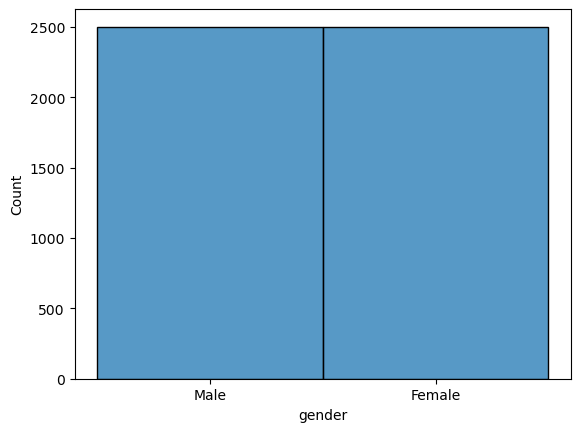

In [8]:
sns.histplot(df['gender'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
df.head() # now converted to numberical

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1       1  
1          1                          0       0  
2          1                          1       1  
3          1                          1       1  
4          0                          0       0

Here, male was encoded

In [10]:
import pandas as pd

outliers_percentage = {}

for col in df.columns:
    if df[col].dtype.kind in 'bifc':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define a condition for outliers
        condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # Calculate the percentage of outliers
        outliers_percentage[col] = (condition.sum() / df.shape[0]) * 100

for col, perc in outliers_percentage.items():
    print(f'The percentage of outliers in {col} is: {perc}%')


The percentage of outliers in long_hair is: 13.0373925214957%
The percentage of outliers in forehead_width_cm is: 0.0%
The percentage of outliers in forehead_height_cm is: 0.0%
The percentage of outliers in nose_wide is: 0.0%
The percentage of outliers in nose_long is: 0.0%
The percentage of outliers in lips_thin is: 0.0%
The percentage of outliers in distance_nose_to_lip_long is: 0.0%
The percentage of outliers in gender is: 0.0%


C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

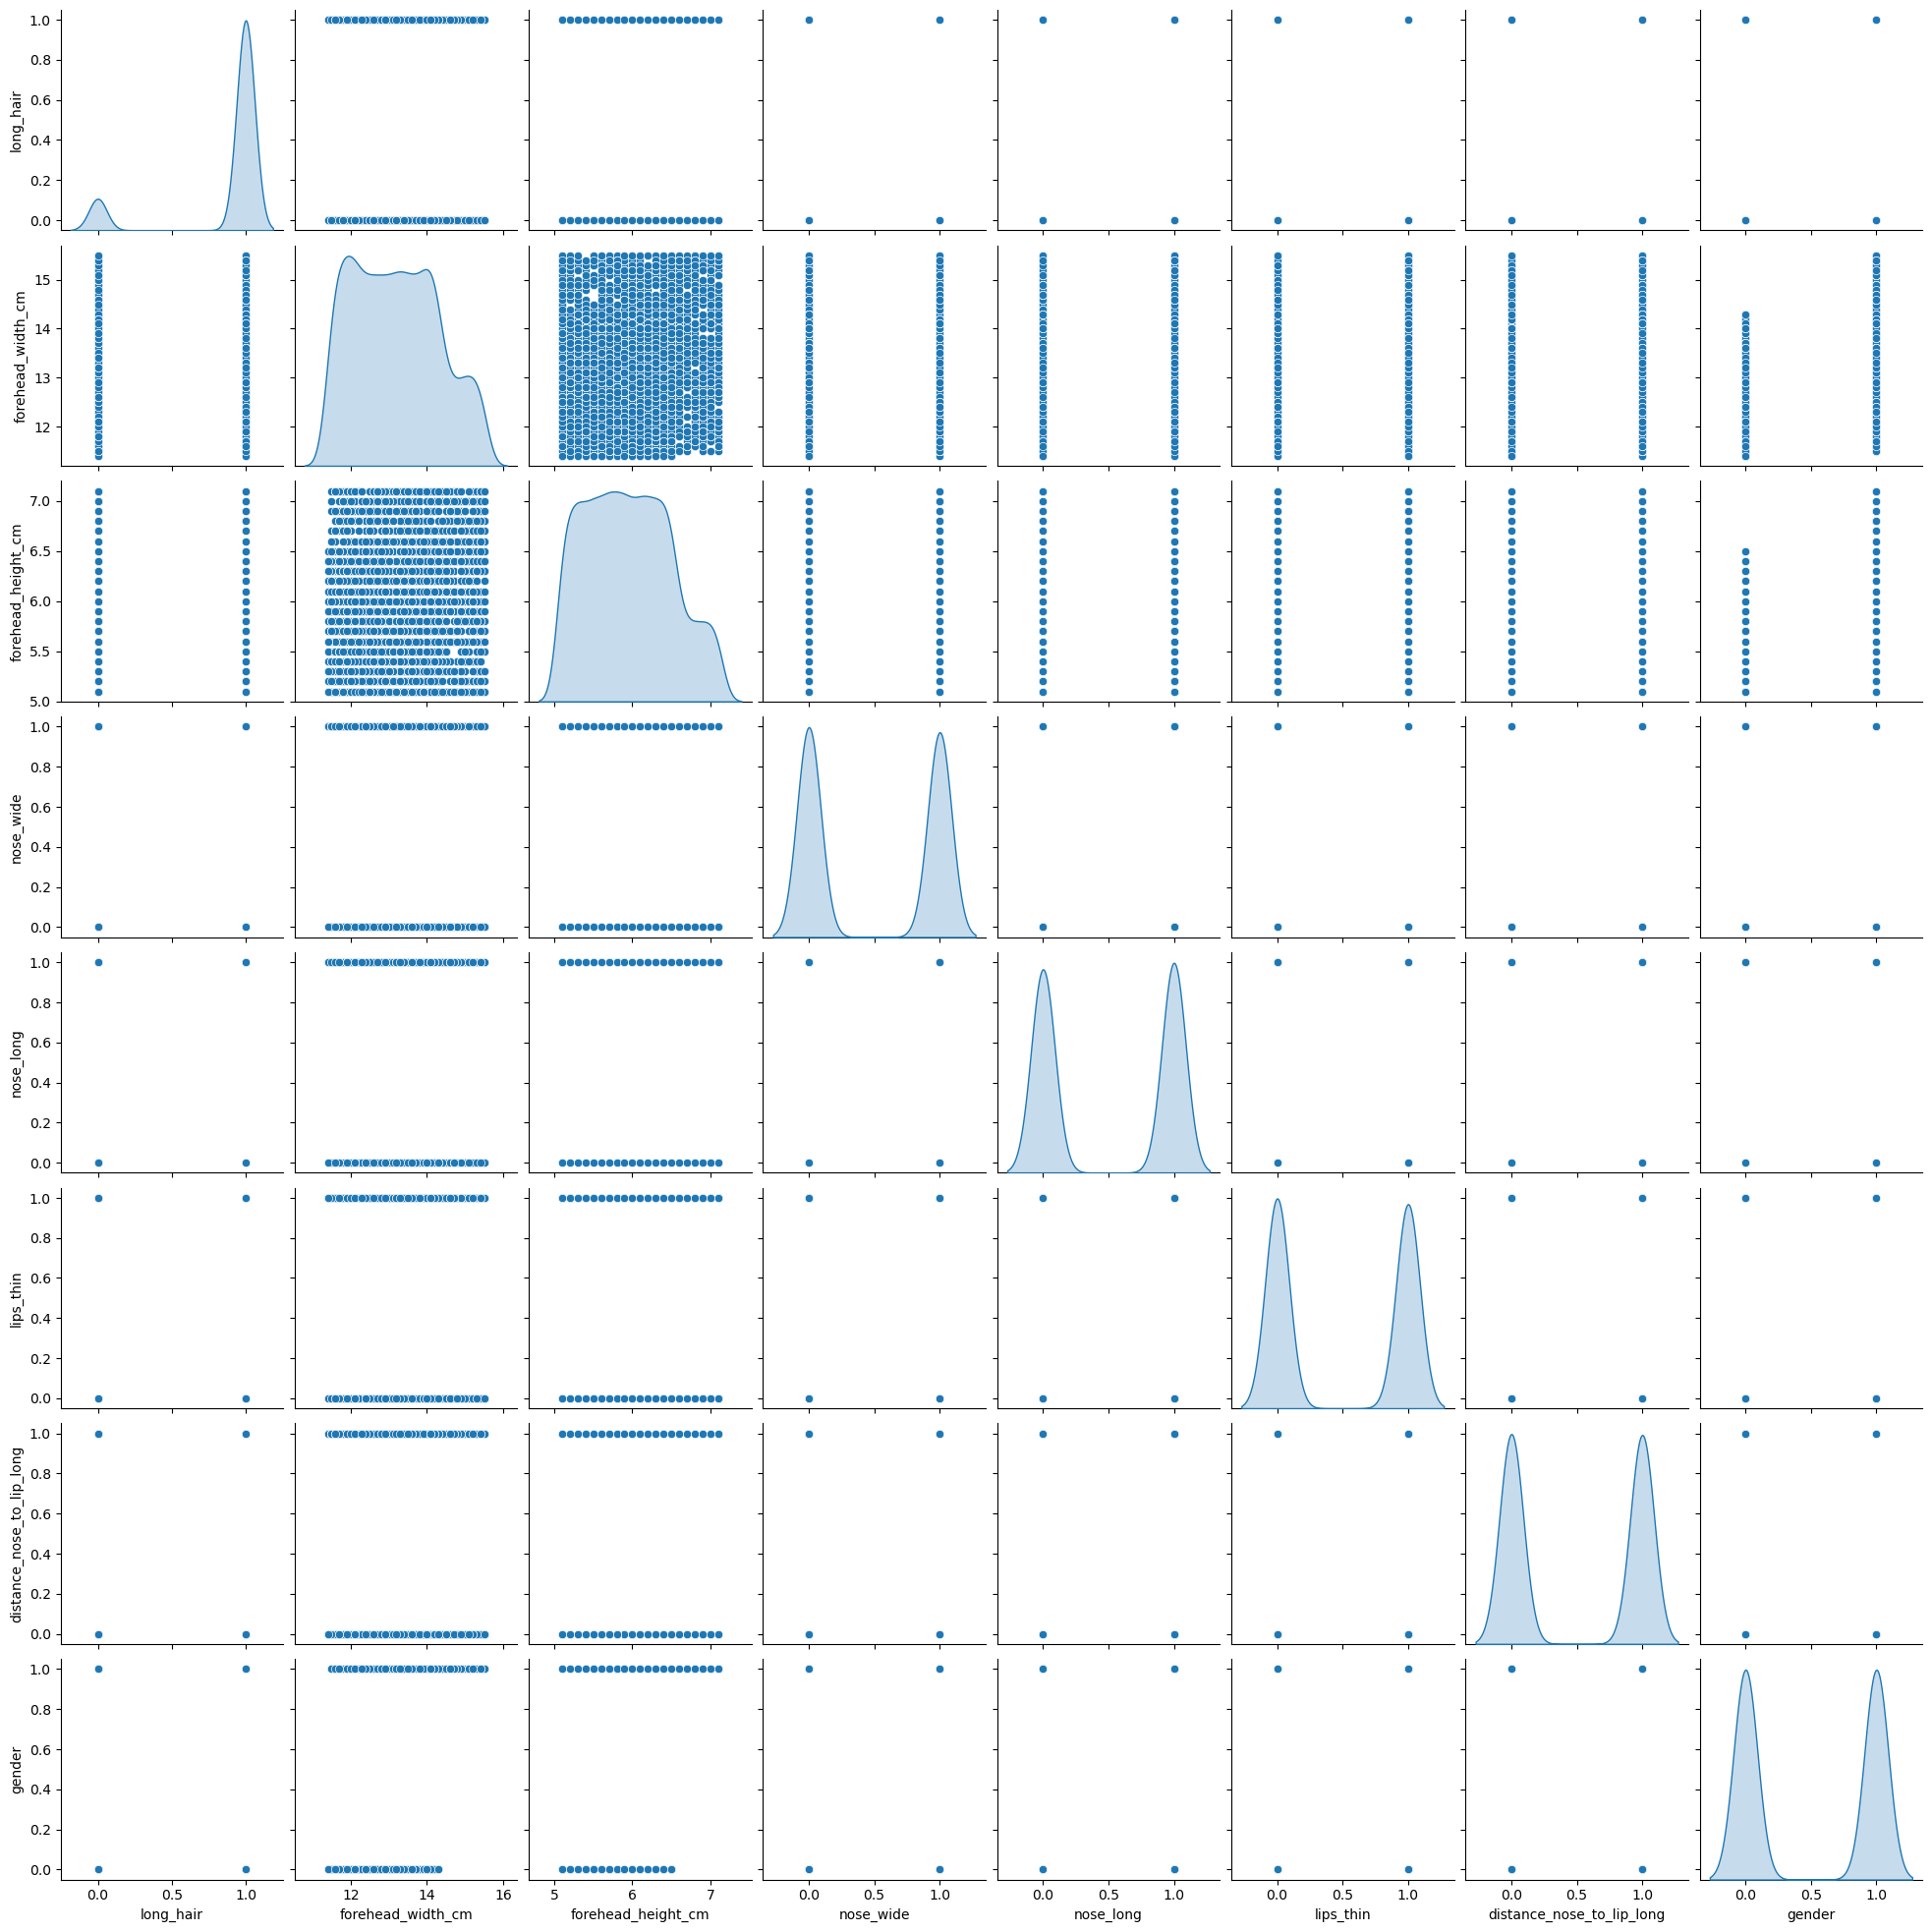

In [11]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [12]:
#getting the correlation matrix of dataframe
df.corr()

long_hair  forehead_width_cm  forehead_height_cm  \
long_hair                   1.000000          -0.006530           -0.017233   
forehead_width_cm          -0.006530           1.000000            0.088596   
forehead_height_cm         -0.017233           0.088596            1.000000   
nose_wide                   0.001216           0.251648            0.211655   
nose_long                   0.014432           0.257368            0.194120   
lips_thin                   0.011287           0.258564            0.205441   
distance_nose_to_lip_long  -0.025794           0.251328            0.215292   
gender                     -0.010767           0.334125            0.277190   

                           nose_wide  nose_long  lips_thin  \
long_hair                   0.001216   0.014432   0.011287   
forehead_width_cm           0.251648   0.257368   0.258564   
forehead_height_cm          0.211655   0.194120   0.205441   
nose_wide                   1.000000   0.565192   0.557615   
nose_long                   0.565192   1.000000   0.561229   
lips_thin                   0.557615   0.561229   1.000000   
distance_nose_to_lip_long   0.569303   0.559794   0.565312   
gender                      0.758502   0.744147   0.743319   

                           distance_nose_to_lip_long    gender  
long_hair                                  -0.025794 -0.010767  
forehead_width_cm                           0.251328  0.334125  
forehead_height_cm                          0.215292  0.277190  
nose_wide                                   0.569303  0.758502  
nose_long                                   0.559794  0.744147  
lips_thin                                   0.565312  0.743319  
distance_nose_to_lip_long                   1.000000  0.754850  
gender                                      0.754850  1.000000

<Axes: >

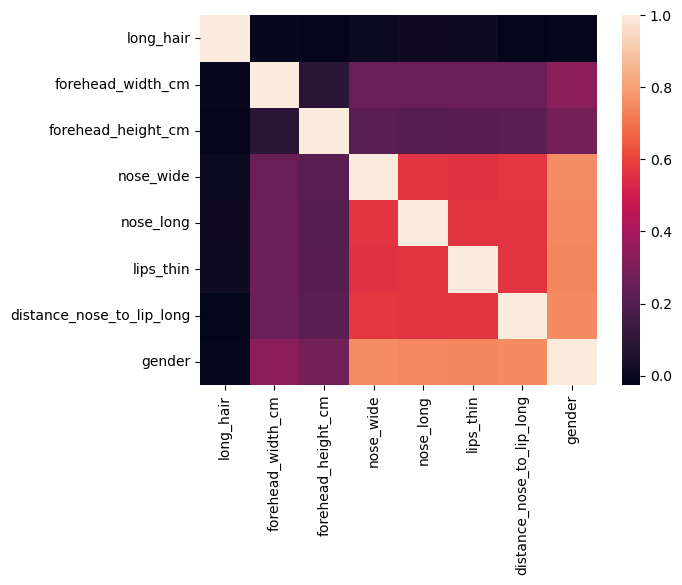

In [13]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

In [14]:
feature_cols = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

# Features
X = df[feature_cols]
y = df['gender'] #dependant variable

# Methodology

The Decision Tree classifier is a predictive modeling approach used for classification problems. It represents decisions in a tree-like structure, with each internal node representing a test on an attribute, each branch representing an outcome of the test, and each leaf node representing a class label.

Entropy is a measure of disorder or impurity in the given dataset. In the decision tree, messy data are split based on values of the feature vector associated with each data point. With each split, the data becomes more homogenous which will decrease the entropy. However, some data in some nodes will not be homogenous, where the entropy value will not be small. The higher the entropy, the harder it is to draw any conclusion. When the tree finally reaches the terminal or leaf node maximum purity is added.

The methodology is as follows:

- Data Preprocessing: The first step involves cleaning and preprocessing the recruitment dataset. This may include handling missing values, converting categorical variables into numerical ones, and normalizing the features. I have already done this right before the methodology section, in the exploratory section.

- Building the Decision Tree: The Decision Tree is built using a top-down, recursive, divide-and-conquer approach. The dataset is recursively partitioned into smaller subsets based on the attribute that provides the highest information gain, which is calculated using entropy.

- Attribute Selection using Entropy: Entropy is a measure of the impurity or disorder of the input data. The attribute with the smallest entropy or the highest information gain is chosen as the decision node.

- Tree Pruning: To avoid overfitting, the Decision Tree may be pruned by removing sections of the tree that provide little power to classify instances.

- Prediction and Evaluation: The constructed Decision Tree is used to predict the class labels of unseen instances in the test set. The performance of the classifier is then evaluated using appropriate metrics such as accuracy, precision, recall, and F1-score.

- Visualization: Visualizing the constructed Decision Tree.

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
X_train.shape , X_test.shape

((3500, 7), (1501, 7))

In [17]:
y_train.shape , y_test.shape

((3500,), (1501,))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

The DecisionTreeClassifier function is used to initialize the classifier with specific parameters. The parameters include the criterion for splitting (set to ‘entropy’ here), the maximum depth of the tree (set to 3), and the random state for reproducibility (set to 0). The initialized classifier is stored in the variable clf_en.

[Text(0.45, 0.9166666666666666, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 3500\nvalue = [1756, 1744]'),
 Text(0.17777777777777778, 0.75, 'x[5] <= 0.5\nentropy = 0.551\nsamples = 1778\nvalue = [1551, 227]'),
 Text(0.08888888888888889, 0.5833333333333334, 'x[1] <= 14.4\nentropy = 0.142\nsamples = 1399\nvalue = [1371, 28]'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[2] <= 6.55\nentropy = 0.091\nsamples = 1387\nvalue = [1371, 16]'),
 Text(0.044444444444444446, 0.25, 'x[6] <= 0.5\nentropy = 0.057\nsamples = 1380\nvalue = [1371, 9]'),
 Text(0.022222222222222223, 0.08333333333333333, 'entropy = 0.018\nsamples = 1205\nvalue = [1203, 2]'),
 Text(0.06666666666666667, 0.08333333333333333, 'entropy = 0.242\nsamples = 175\nvalue = [168, 7]'),
 Text(0.08888888888888889, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.26666666666666666, 0.5833333333333334, 'x[6] <= 0.5\nentropy = 0.998\nsa

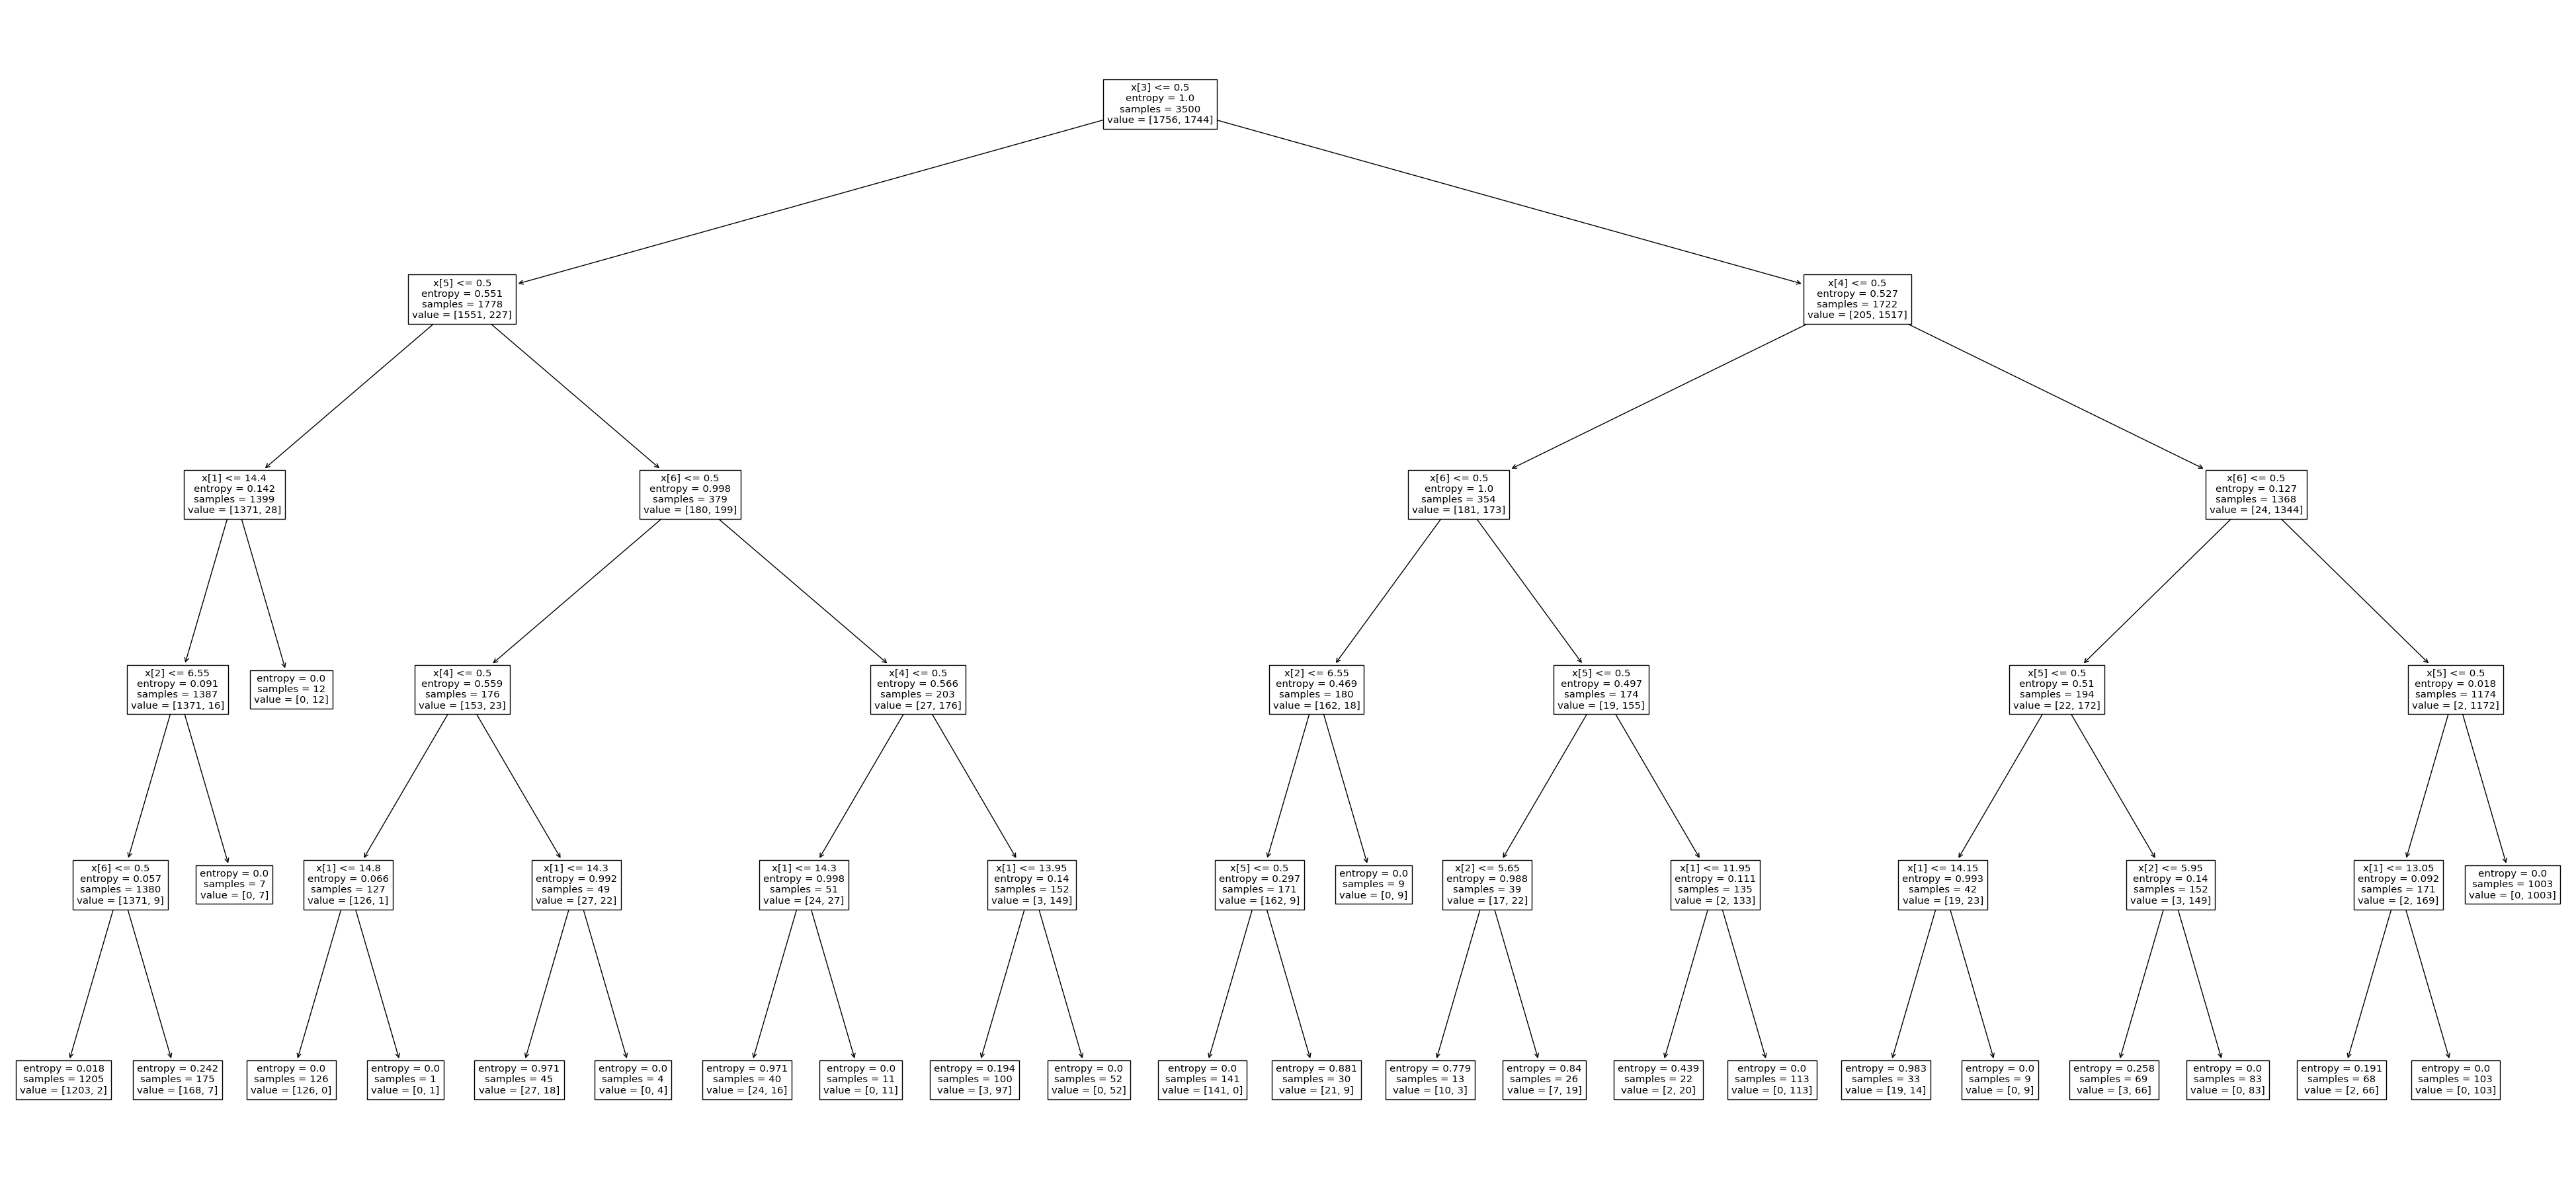

In [20]:
plt.figure(figsize=(50,23))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

The tree is read from top to bottom. At each node, the decision is made based on the condition, and you follow the branch corresponding to the outcome of the decision, until you reach a leaf node which gives the final decision. This is a common way to visualize decision tree models in machine learning.

In [21]:
#Predict the values 
y_pred_en = clf_en.predict(X_test)

In [22]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)

In [23]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9674
Training-set accuracy score: 0.9754


In [24]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9754
Test set score: 0.9674


In [25]:
import os
import graphviz

print(os.path.dirname(graphviz.__file__))

C:\Users\mahik\anaconda3\Lib\site-packages\graphviz


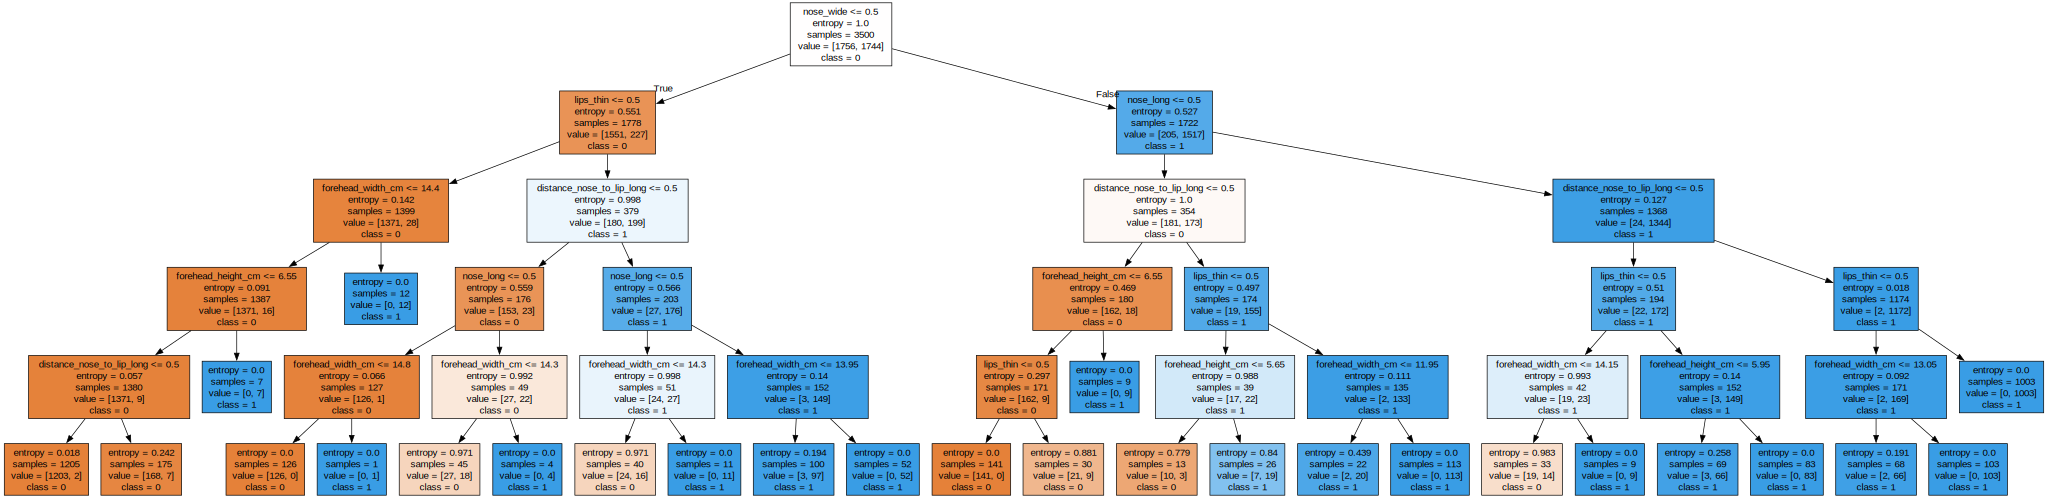

In [26]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\mahik\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin'



import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
# Visualize the Decision Tree
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Result Analysis

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [28]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[737   8]
 [ 41 715]]


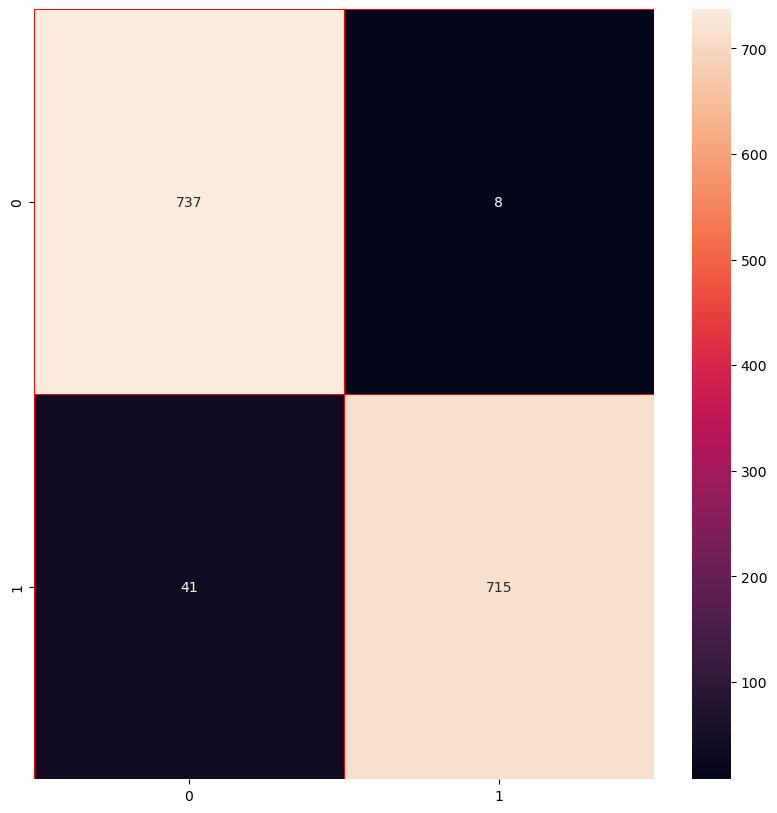

<Figure size 640x480 with 0 Axes>

In [29]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

- True Positive (TP): The top left cell with 737 represents the number of positive instances (class 1) correctly predicted as positive by the model.
- False Negative (FN): The top right cell with 8 represents the number of positive instances incorrectly predicted as negative (class 0).
- False Positive (FP): The bottom left cell with 41 represents the number of negative instances (class 0) incorrectly predicted as positive.
- True Negative (TN): The bottom right cell with 715 represents the number of negative instances correctly predicted as negative.

In [30]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       745
           1       0.99      0.95      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [31]:
f1_score = f1_score(y_test, y_pred_en)
print("F1 Score:",f1_score)

F1 Score: 0.966869506423259


In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)

[Text(0.4838709677419355, 0.9375, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 3500\nvalue = [1756, 1744]'),
 Text(0.2157258064516129, 0.8125, 'x[5] <= 0.5\nentropy = 0.551\nsamples = 1778\nvalue = [1551, 227]'),
 Text(0.12096774193548387, 0.6875, 'x[1] <= 14.4\nentropy = 0.142\nsamples = 1399\nvalue = [1371, 28]'),
 Text(0.10483870967741936, 0.5625, 'x[2] <= 6.55\nentropy = 0.091\nsamples = 1387\nvalue = [1371, 16]'),
 Text(0.08870967741935484, 0.4375, 'x[6] <= 0.5\nentropy = 0.057\nsamples = 1380\nvalue = [1371, 9]'),
 Text(0.03225806451612903, 0.3125, 'x[1] <= 13.65\nentropy = 0.018\nsamples = 1205\nvalue = [1203, 2]'),
 Text(0.016129032258064516, 0.1875, 'entropy = 0.0\nsamples = 933\nvalue = [933, 0]'),
 Text(0.04838709677419355, 0.1875, 'x[2] <= 5.85\nentropy = 0.063\nsamples = 272\nvalue = [270, 2]'),
 Text(0.03225806451612903, 0.0625, 'entropy = 0.0\nsamples = 140\nvalue = [140, 0]'),
 Text(0.06451612903225806, 0.0625, 'entropy = 0.113\nsamples = 132\nvalue = [130, 2]'),
 Text(0.1451

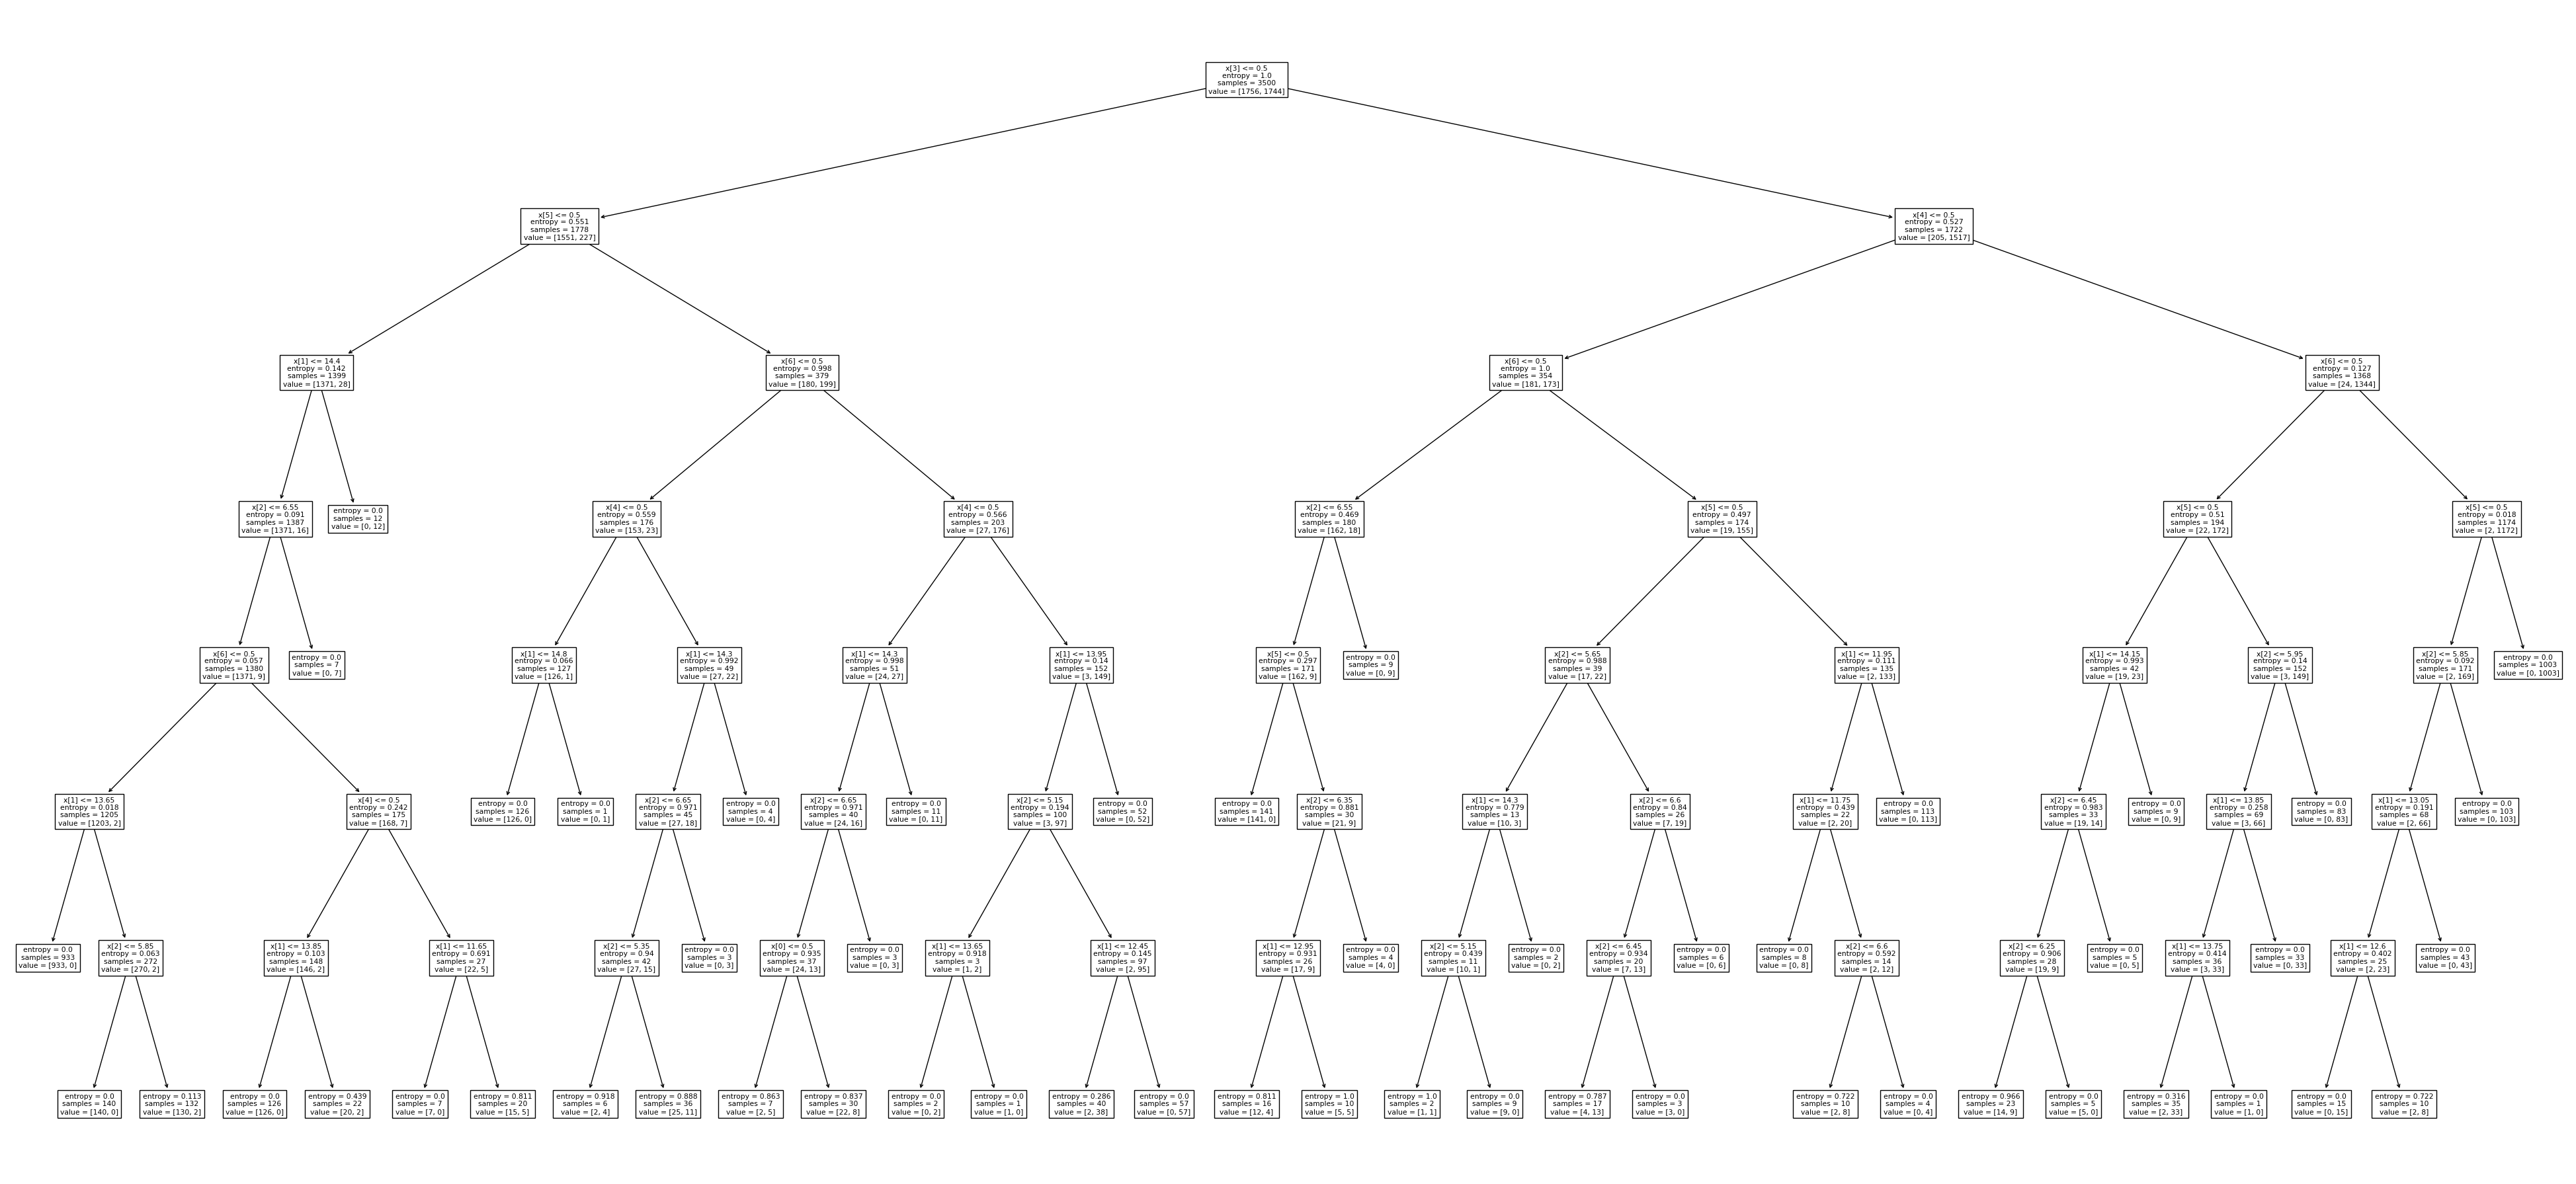

In [33]:
plt.figure(figsize=(50,23))
tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [34]:
#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(X_train)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Model accuracy score with criterion entropy: 0.9674
Training-set accuracy score: 0.9820
Training set score: 0.9820
Test set score: 0.9694


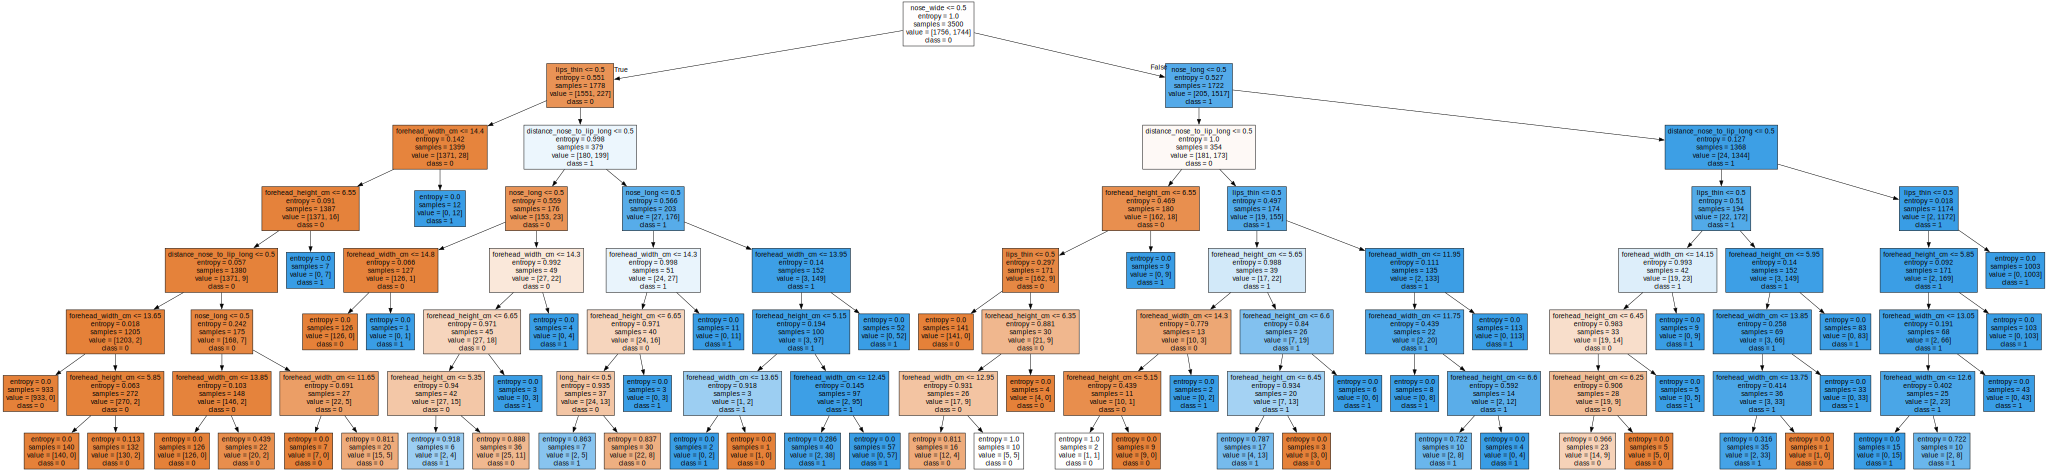

In [35]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [36]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[737   8]
 [ 41 715]]


Confusion matrix

 [[737   8]
 [ 41 715]]


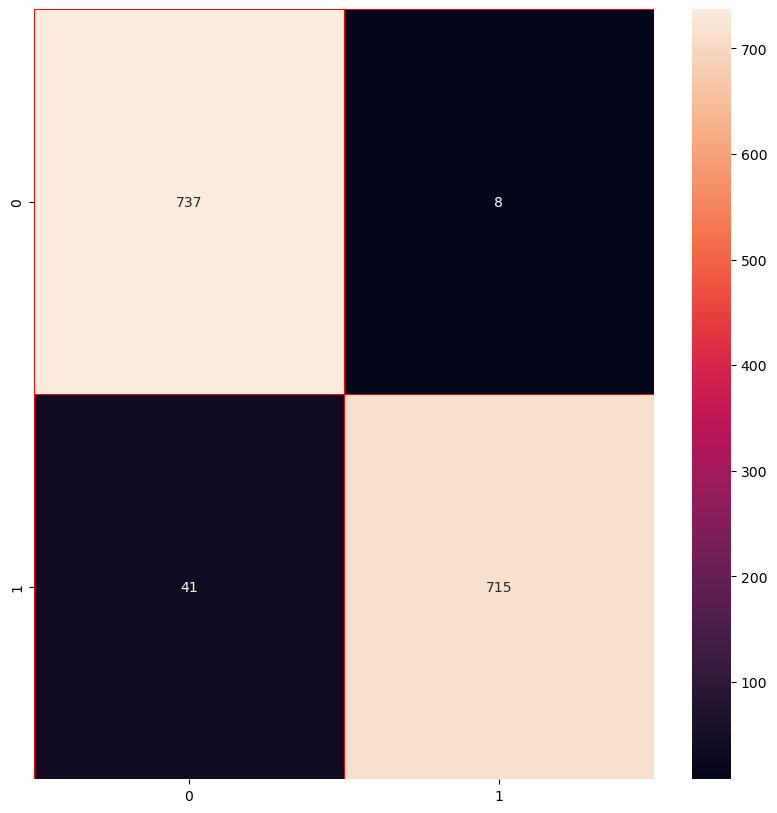

<Figure size 640x480 with 0 Axes>

In [37]:
print('Confusion matrix\n\n', cm)
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

True Positives (TP): The top left cell with the number 737 represents the true positives, meaning the model correctly predicted 737 instances of the positive class.

False Positives (FP): The top right cell with the number 8 represents the false positives, meaning the model incorrectly predicted 8 instances as the positive class when they were actually the negative class.

False Negatives (FN): The bottom left cell with the number 41 represents the false negatives, meaning the model incorrectly predicted 41 instances as the negative class when they were actually the positive class.

True Negatives (TN): The bottom right cell with the number 715 represents the true negatives, meaning the model correctly predicted 715 instances of the negative class.

In [38]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       745
           1       0.99      0.95      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



- **Precision**: For both classes (0 and 1), the precision is 0.95 and 0.99 respectively, which is quite high.

- **Recall (Sensitivity)**: For class 0, the recall is 0.99, and for class 1, it's 0.95. This means the model is good at predicting the positives for both classes.

- **F1-score**: An F1 Score of 0.97 for both classes indicates that the classifier has a good balance of precision and recall.

- **Support**: This is the number of samples of the true response that lie in that class. There are 745 samples for class 0 and 756 samples for class 1.

- **Accuracy**: 97% of all classifications were correct.

- **Macro Avg**: This is the average Precision, Recall or F1 score between classes. If the Macro Avg is high, it means the classifier is performing well across all classes.

- **Weighted Avg**: This is the average Precision, Recall or F1 score between classes weighted by the number of true instances for each label. A high Weighted Avg means the classifier is performing well, considering the imbalance of classes.

In [39]:
from sklearn.metrics import f1_score

# Now you can use f1_score as a function
f1_score_value = f1_score(y_test, y_pred_en)
print("F1 Score:", f1_score_value)

F1 Score: 0.966869506423259


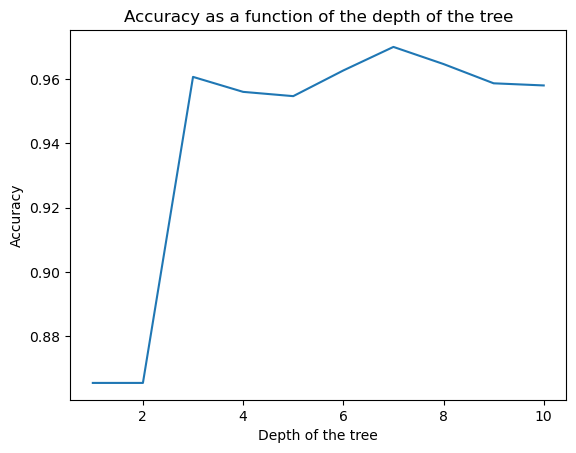

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# List of depths to try
depths = list(range(1, 11))

# List to store the accuracy for each depth
accuracies = []

for depth in depths:
    # Train a decision tree with the current depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions on the validation set and calculate the accuracy
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    # Store the accuracy
    accuracies.append(accuracy)

# Plot the accuracies
plt.plot(depths, accuracies)
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the depth of the tree')
plt.show()

From the graph, it can be observed that as the depth of the tree increases from 2 to around 6, the accuracy of the model also increases significantly. This suggests that a more complex model (with greater depth) can capture more patterns in the data, thereby improving the model’s performance.

However, beyond a depth of 6, the accuracy plateaus and remains relatively constant up to a depth of 10. This indicates that beyond a certain depth, increasing the complexity of the model does not lead to significant gains in accuracy. This could be due to overfitting, where the model becomes too complex and starts to capture the noise along with the underlying pattern in the data.

<center> <h1> Lab 5B) CART Construction using GINI </h1></center>

# Objective
To implement Decision Tree Classifier using Gini index as the attribute selection measure. This classifier, also known as CART, will be applied to the same dataset used in Part A to predict the outcomes and compare the performance with entropy-based model.

Additionally, a new dataset will be selected for a regression problem and a Regression Tree will be constructed to predict the continuous outcome based on the input parameters in the dataset. THe constructed Regression Tree will then be visualised

# Methodology
For constructing the CART (Classification and Regression Tree) using the Gini index, the methodology is largely the same as with entropy. The key difference lies in the attribute selection measure:

Attribute Selection using Gini Index: The Gini index is another measure of impurity or disorder. It calculates the probability of a random sample being classified incorrectly if you randomly pick a label according to the distribution in a subset. The attribute with the smallest Gini index (or the largest decrease in the Gini index) is chosen as the decision node.

The rest of the steps including data preprocessing, tree building, tree pruning, prediction and evaluation, and visualization remain the same as in the entropy-based approach.

Entropy tends to produce balanced trees, Gini index tends to isolate the most dominant classes in its first splits, leading to potentially less balanced trees.

In [43]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

[Text(0.453125, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.5\nsamples = 3500\nvalue = [1762, 1738]'),
 Text(0.16875, 0.75, 'x[3] <= 0.5\ngini = 0.206\nsamples = 1761\nvalue = [1556, 205]'),
 Text(0.1, 0.5833333333333334, 'x[1] <= 14.35\ngini = 0.034\nsamples = 1396\nvalue = [1372, 24]'),
 Text(0.075, 0.4166666666666667, 'x[2] <= 6.65\ngini = 0.019\nsamples = 1385\nvalue = [1372, 13]'),
 Text(0.05, 0.25, 'x[5] <= 0.5\ngini = 0.016\nsamples = 1383\nvalue = [1372, 11]'),
 Text(0.025, 0.08333333333333333, 'gini = 0.002\nsamples = 1205\nvalue = [1204, 1]'),
 Text(0.075, 0.08333333333333333, 'gini = 0.106\nsamples = 178\nvalue = [168, 10]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.2375, 0.5833333333333334, 'x[4] <= 0.5\ngini = 0.5\nsamples = 365\nvalue = [184, 181]'),
 Text(0.175, 0.4166666666666667, 'x[2] <= 6.55\ngini = 0.2\nsamples = 186\nvalue = [165, 21]'),
 Text(0.15, 0.25, 'x[1]

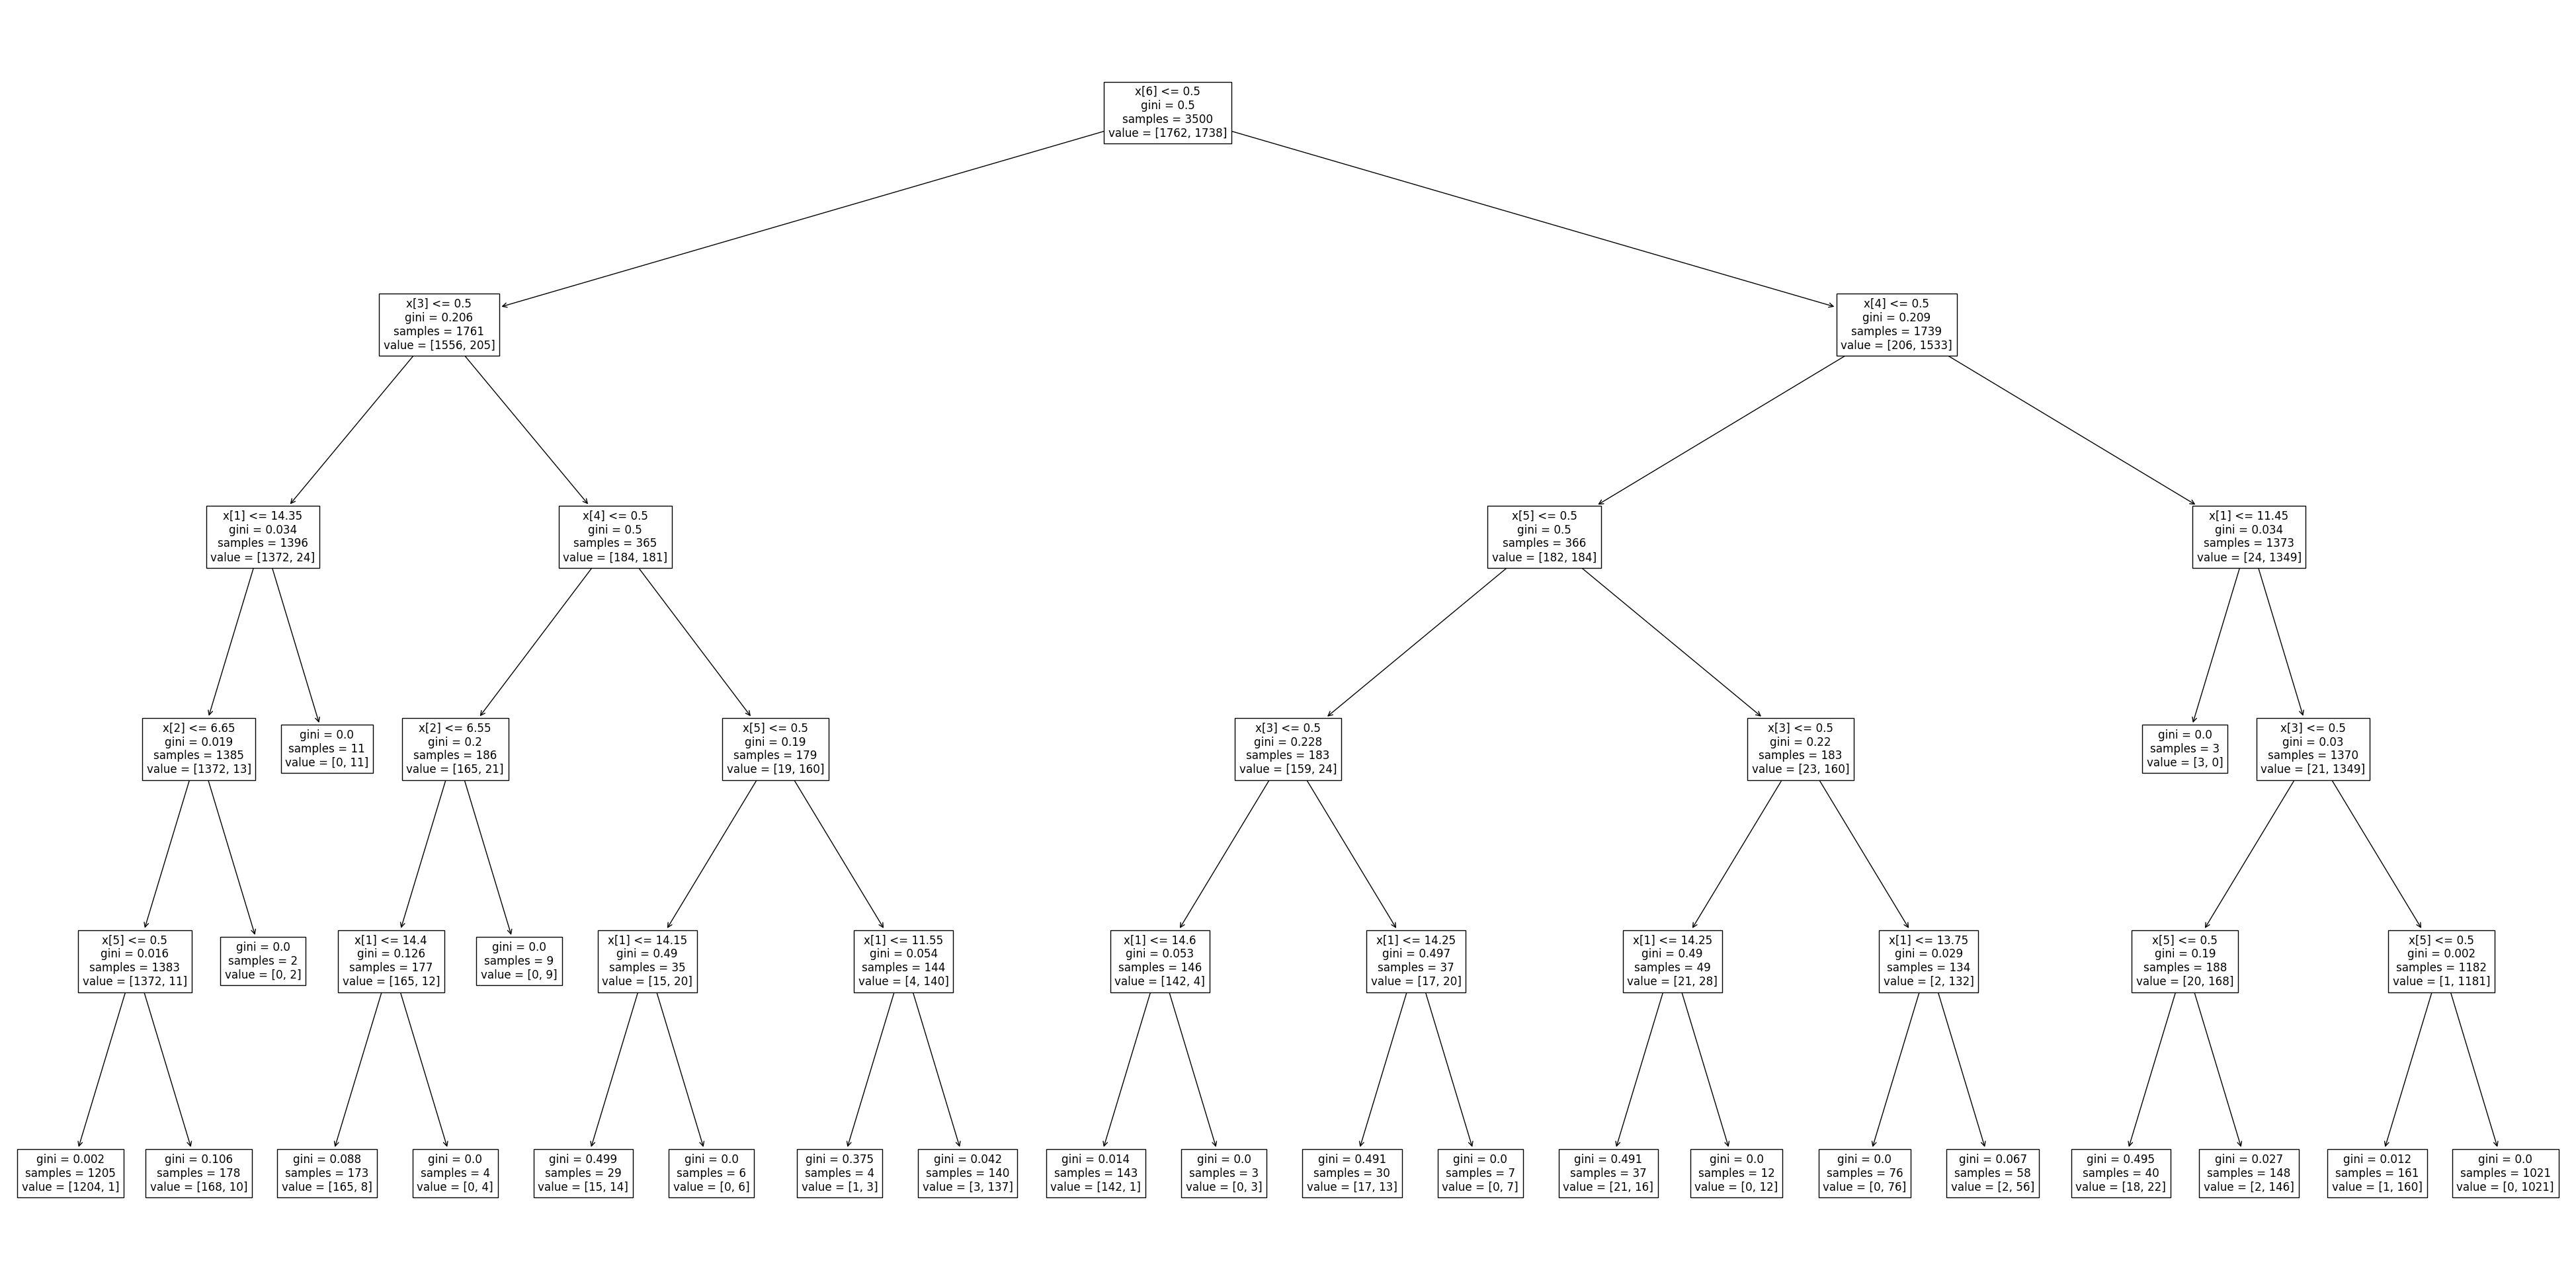

In [45]:
#Plot the tree
plt.figure(figsize=(50,25))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [46]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)

In [47]:
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([1, 0, 1, ..., 0, 0, 0])

In [48]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9667
Training-set accuracy score: 0.9743


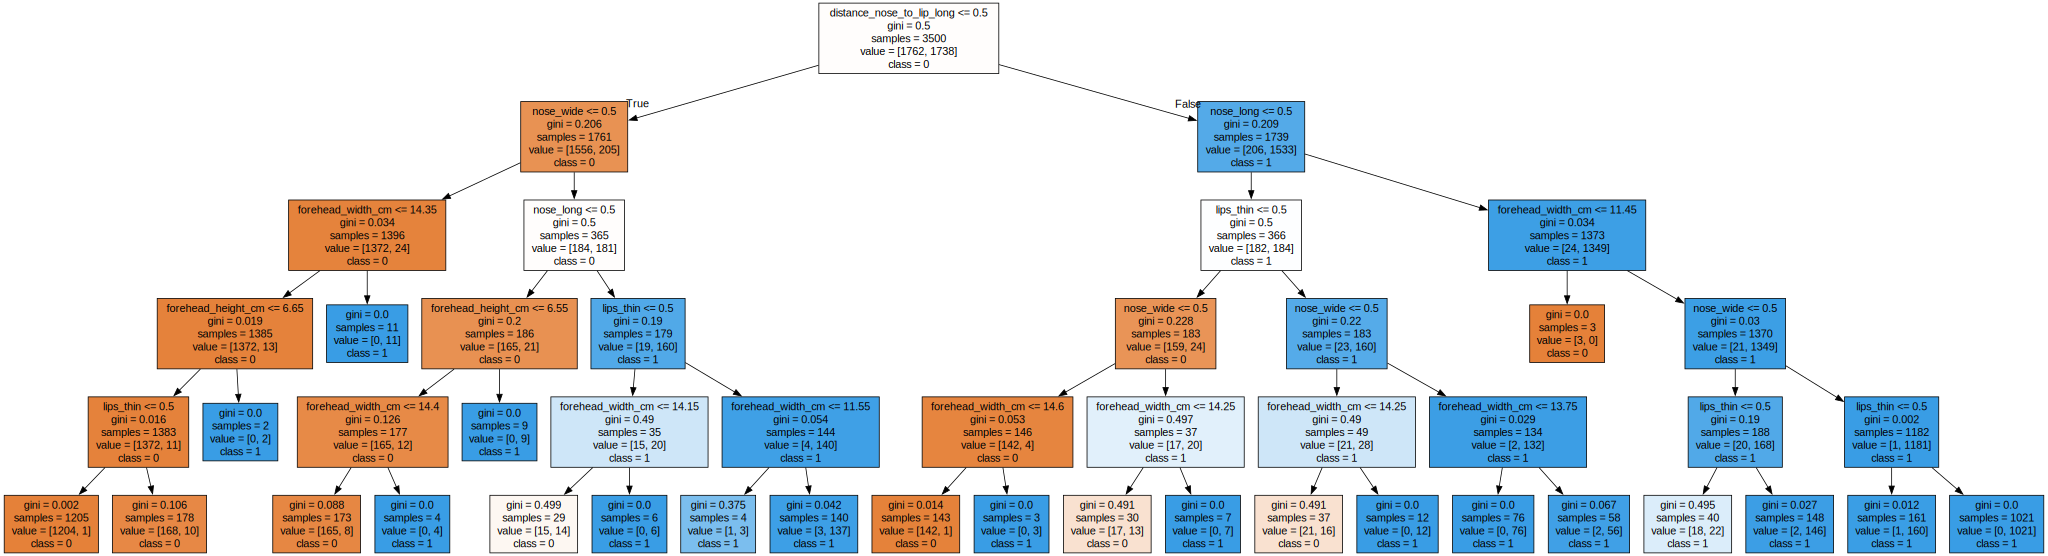

In [50]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\mahik\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin'



import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
# Visualize the Decision Tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Result Analysis

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score

In [53]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[729  16]
 [ 34 722]]


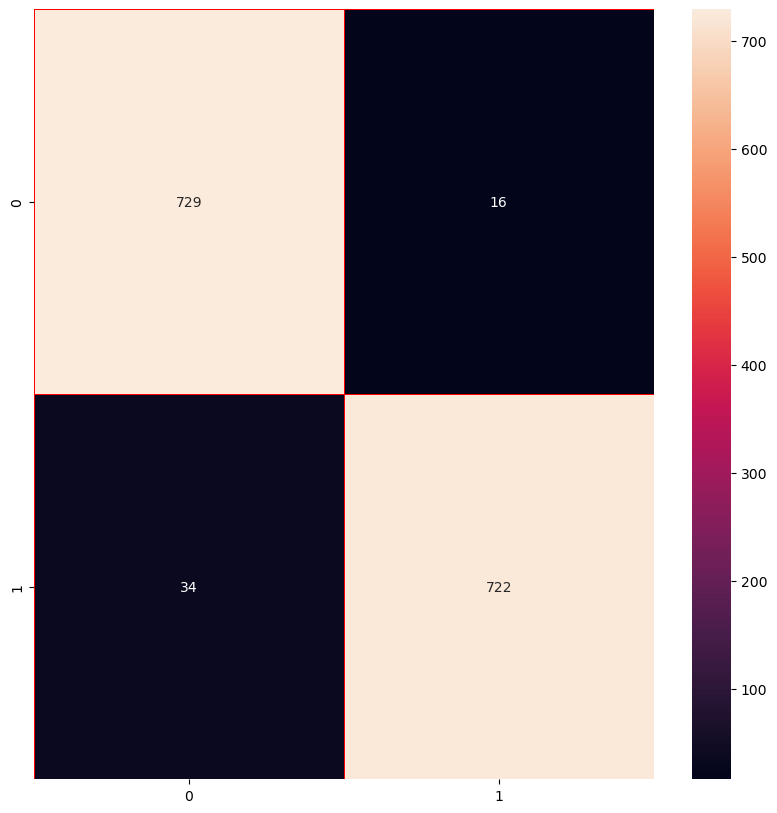

<Figure size 640x480 with 0 Axes>

In [54]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

- True Negatives (TN): The top left cell with “729” represents the number of true negatives, i.e., the number of negative instances (0s) correctly predicted as negative.
- False Positives (FP): The top right cell with “16” represents the number of false positives, i.e., the number of negative instances (0s) incorrectly predicted as positive (1s).
- False Negatives (FN): The bottom left cell with “34” represents the number of false negatives, i.e., the number of positive instances (1s) incorrectly predicted as negative (0s).
- True Positives (TP): The bottom right cell with “722” represents the number of true positives, i.e., the number of positive instances (1s) correctly predicted as positive.

In [55]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       745
           1       0.98      0.96      0.97       756

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



- **Precision**: This is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate. For both classes (0 and 1), the precision is 0.96 and 0.98 respectively.

- **Recall (Sensitivity)**: This is the ratio of correctly predicted positive observations to all actual positives. For class 0, the recall is 0.98, and for class 1, it's 0.96. This means the model is good at predicting the positives for both classes.

- **F1-score**: This is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. An F1 Score of 0.97 for both classes indicates that the classifier has a good balance of precision and recall.

- **Support**: This is the number of samples of the true response that lie in that class. There are 745 samples for class 0 and 756 samples for class 1.

- **Accuracy**: This is the ratio of correctly predicted observations to the total observations. An accuracy of 0.97 indicates that 97% of all classifications were correct.

- **Macro Avg**: This is the average Precision, Recall or F1 score between classes. If the Macro Avg is high, it means the classifier is performing well across all classes.

- **Weighted Avg**: This is the average Precision, Recall or F1 score between classes weighted by the number of true instances for each label. A high Weighted Avg means the classifier is performing well, considering the imbalance of classes.

In [60]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred_gini)
print("F1 Score:",f1_score)

F1 Score: 0.9665327978580991


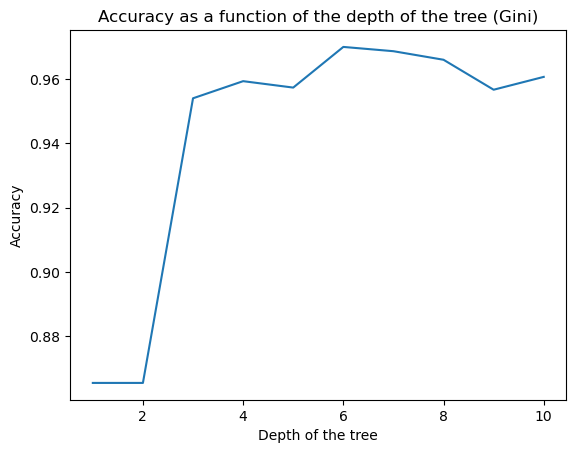

In [61]:
# List to store the accuracy for each depth
accuracies_gini = []

for depth in depths:
    # Train a decision tree with the current depth
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf_gini.fit(X_train, y_train)
    
    # Make predictions on the validation set and calculate the accuracy
    y_pred_gini = clf_gini.predict(X_val)
    accuracy_gini = accuracy_score(y_val, y_pred_gini)
    
    # Store the accuracy
    accuracies_gini.append(accuracy_gini)

# Plot the accuracies
plt.plot(depths, accuracies_gini)
plt.xlabel('Depth of the tree')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the depth of the tree (Gini)')
plt.show()

The x-axis represents the “Depth of the tree”, ranging from 2 to 10. The y-axis represents the “Accuracy”, ranging from 0.88 to 0.96.The blue line represents the accuracy of the model at different depths.
There’s a sharp increase in accuracy from a depth of 2 to around 4, reaching just below 0.96.The accuracy then plateaus between depths of about 4 and 8, maintaining high accuracy. After a depth of 8, there’s a slight decrease in accuracy.

In [63]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

[Text(0.4647727272727273, 0.9285714285714286, 'x[6] <= 0.5\ngini = 0.5\nsamples = 3500\nvalue = [1762, 1738]'),
 Text(0.18863636363636363, 0.7857142857142857, 'x[3] <= 0.5\ngini = 0.206\nsamples = 1761\nvalue = [1556, 205]'),
 Text(0.10909090909090909, 0.6428571428571429, 'x[1] <= 14.35\ngini = 0.034\nsamples = 1396\nvalue = [1372, 24]'),
 Text(0.09090909090909091, 0.5, 'x[2] <= 6.65\ngini = 0.019\nsamples = 1385\nvalue = [1372, 13]'),
 Text(0.07272727272727272, 0.35714285714285715, 'x[5] <= 0.5\ngini = 0.016\nsamples = 1383\nvalue = [1372, 11]'),
 Text(0.03636363636363636, 0.21428571428571427, 'x[1] <= 14.15\ngini = 0.002\nsamples = 1205\nvalue = [1204, 1]'),
 Text(0.01818181818181818, 0.07142857142857142, 'gini = 0.0\nsamples = 1132\nvalue = [1132, 0]'),
 Text(0.05454545454545454, 0.07142857142857142, 'gini = 0.027\nsamples = 73\nvalue = [72, 1]'),
 Text(0.10909090909090909, 0.21428571428571427, 'x[4] <= 0.5\ngini = 0.106\nsamples = 178\nvalue = [168, 10]'),
 Text(0.09090909090909091

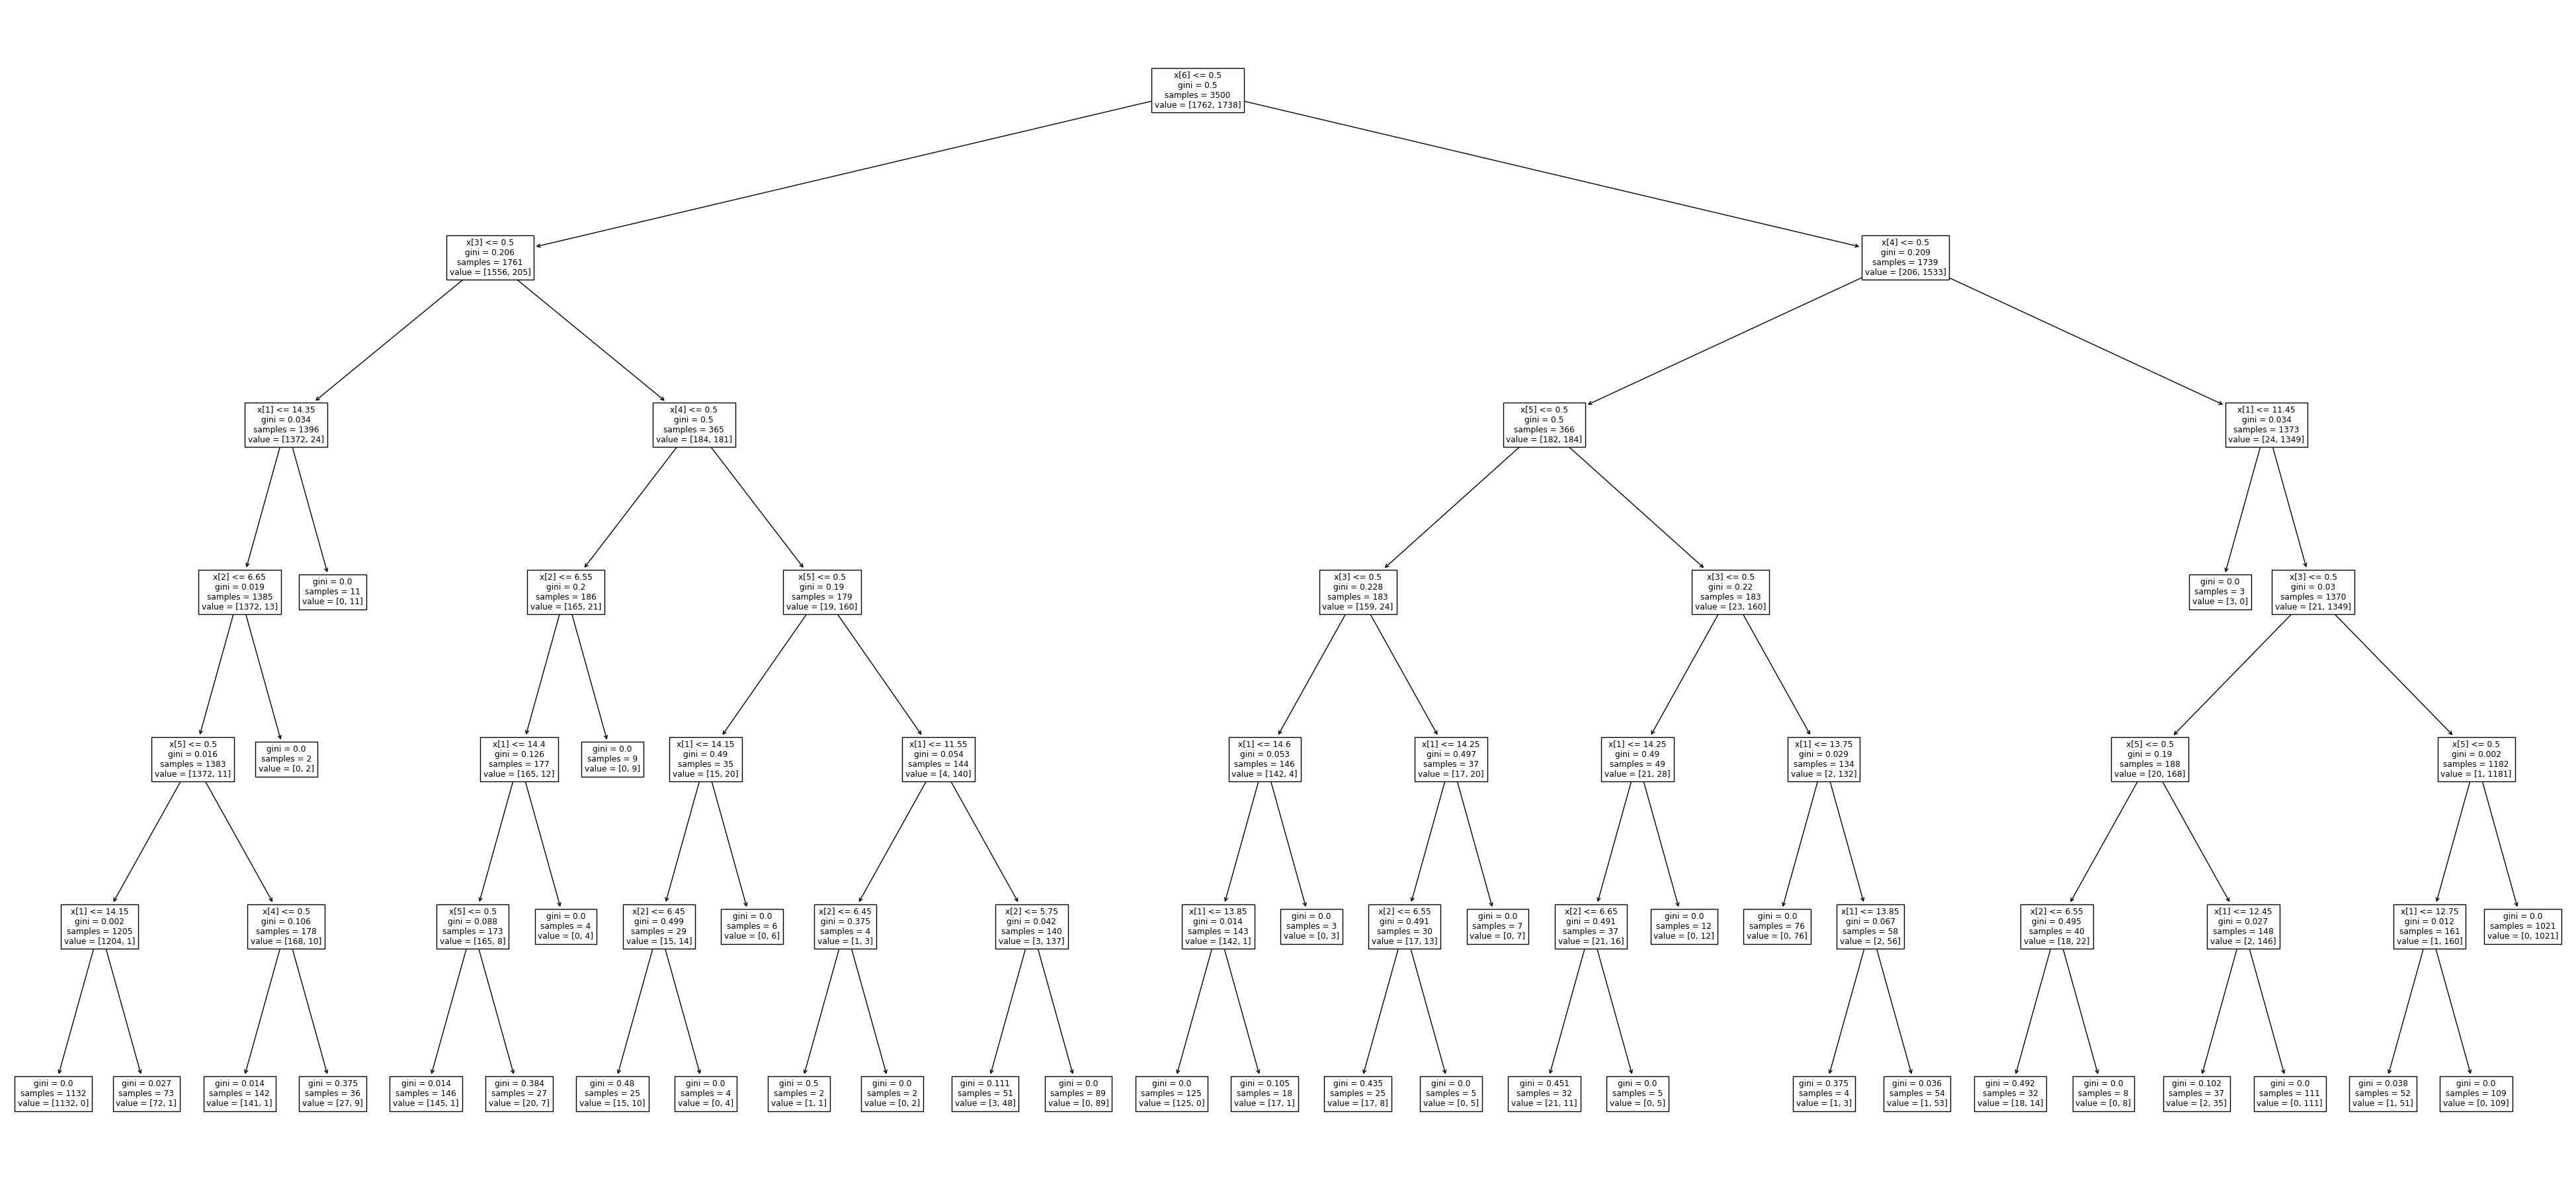

In [64]:
plt.figure(figsize=(50,23))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [65]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([1, 0, 1, ..., 0, 0, 0])

In [66]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9780
Training-set accuracy score: 0.9794


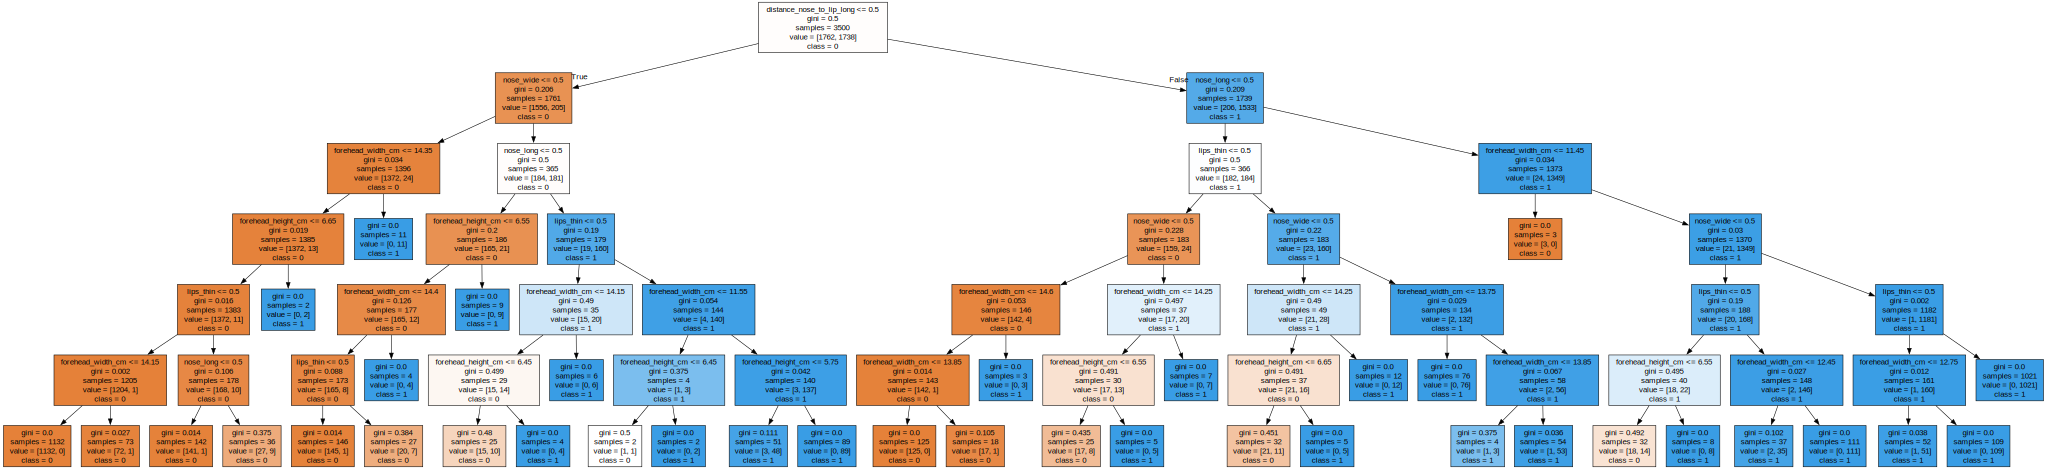

In [67]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\mahik\Downloads\windows_10_msbuild_Release_graphviz-9.0.0-win32\Graphviz\bin'



import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
# Visualize the Decision Tree
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [68]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[741   4]
 [ 29 727]]


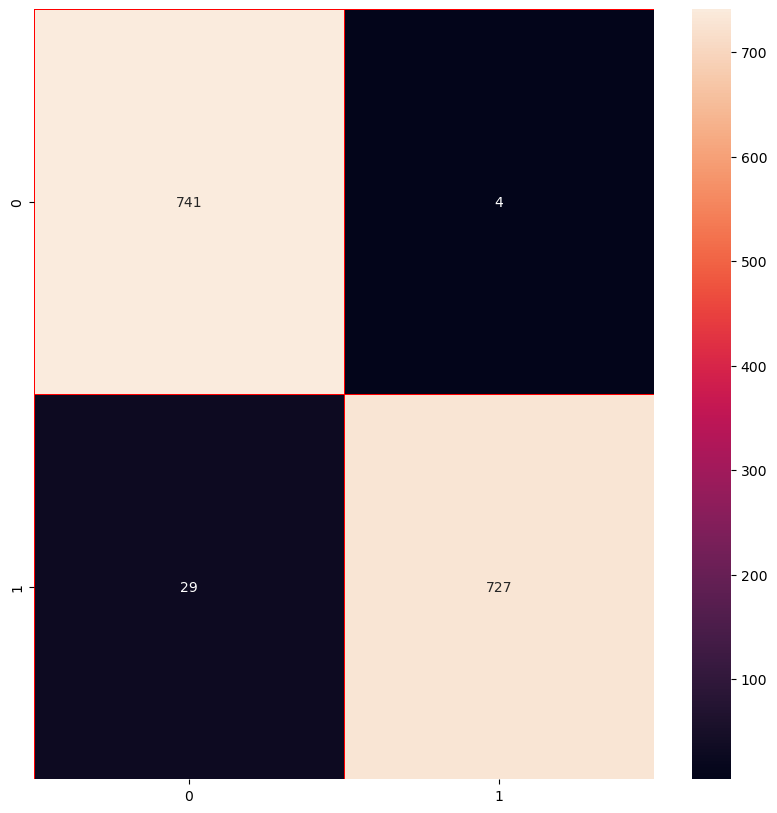

<Figure size 640x480 with 0 Axes>

In [69]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

- True Negatives (TN): The top left cell with “741” represents the number of true negatives, i.e., the number of negative instances (0s) correctly predicted as negative.
- False Positives (FP): The top right cell with “4” represents the number of false positives, i.e., the number of negative instances (0s) incorrectly predicted as positive (1s).
- False Negatives (FN): The bottom left cell with “29” represents the number of false negatives, i.e., the number of positive instances (1s) incorrectly predicted as negative (0s).
- True Positives (TP): The bottom right cell with “727” represents the number of true positives, i.e., the number of positive instances (1s) correctly predicted as positive.

In [70]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       745
           1       0.99      0.96      0.98       756

    accuracy                           0.98      1501
   macro avg       0.98      0.98      0.98      1501
weighted avg       0.98      0.98      0.98      1501



For both classes (0 and 1), the precision, recall, and F1-score are all high (around 0.96 to 0.99). The overall accuracy of the model is 0.98, which means it correctly predicted 98% of all instances. Both the macro and weighted averages for precision, recall, and F1-score are also 0.98, indicating that the model performs well across both classes, even when considering the imbalance of classes.

In [71]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred_gini)
print("F1 Score:",f1_score)

F1 Score: 0.9778076664425017


 For both classes (0 and 1), the precision, recall, and F1-score are all high (around 0.96 to 0.99). The overall accuracy of the model is 0.98, which means it correctly predicted 98% of all instances. Both the macro and weighted averages for precision, recall, and F1-score are also 0.98, indicating that the model performs well across both classes

# Decision Tree Regression

# Dataset Description

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

INDEPENDENT VARIABLES
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )

DEPENDANT VARIABLE
- Chance of Admit ( ranging from 0 to 1 )

# Exploratory Data Analysis

In [72]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns

df=pd.read_csv('adm_data.csv')
df.head(20) 

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0            1        337          118                  4  4.5   4.5  9.65   
1            2        324          107                  4  4.0   4.5  8.87   
2            3        316          104                  3  3.0   3.5  8.00   
3            4        322          110                  3  3.5   2.5  8.67   
4            5        314          103                  2  2.0   3.0  8.21   
5            6        330          115                  5  4.5   3.0  9.34   
6            7        321          109                  3  3.0   4.0  8.20   
7            8        308          101                  2  3.0   4.0  7.90   
8            9        302          102                  1  2.0   1.5  8.00   
9           10        323          108                  3  3.5   3.0  8.60   
10          11        325          106                  3  3.5   4.0  8.40   
11          12        327          111                  4  4.0   4.5  9.00   
12          13        328          112                  4  4.0   4.5  9.10   
13          14        307          109                  3  4.0   3.0  8.00   
14          15        311          104                  3  3.5   2.0  8.20   
15          16        314          105                  3  3.5   2.5  8.30   
16          17        317          107                  3  4.0   3.0  8.70   
17          18        319          106                  3  4.0   3.0  8.00   
18          19        318          110                  3  4.0   3.0  8.80   
19          20        303          102                  3  3.5   3.0  8.50   

    Research  Chance of Admit   
0          1              0.92  
1          1              0.76  
2          1              0.72  
3          1              0.80  
4          0              0.65  
5          1              0.90  
6          1              0.75  
7          0              0.68  
8          0              0.50  
9          0              0.45  
10         1              0.52  
11         1              0.84  
12         1              0.78  
13         1              0.62  
14         1              0.61  
15         0              0.54  
16         0              0.66  
17         1              0.65  
18         0              0.63  
19         0              0.62

In [73]:
df.shape #get the shape of dataframe created

(400, 9)

In [74]:
df.isna().sum() #check the number of missing values in each column

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [75]:
df.dtypes #check the data types of each column in dataframe

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [78]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.340000  
25%      3.000000    8.170000    0.000000          0.640000  
50%      3.500000    8.610000    1.000000          0.730000  
75%      4.000000    9.062500    1.000000          0.830000  
max      5.000000    9.920000    1.000000          0.970000

C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Chance of Admit ', ylabel='Count'>

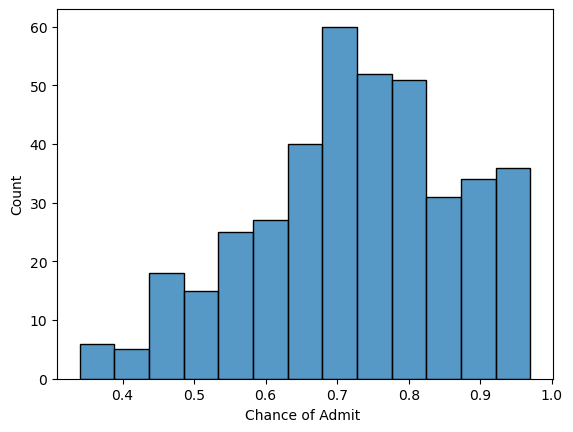

In [80]:
sns.histplot(df['Chance of Admit '])

In [134]:
import pandas as pd

outliers_percentage = {}

for col in df.columns:
    if df[col].dtype.kind in 'bifc':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define a condition for outliers
        condition = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # Calculate the percentage of outliers
        outliers_percentage[col] = (condition.sum() / df.shape[0]) * 100

for col, perc in outliers_percentage.items():
    print(f'The percentage of outliers in {col} is: {perc}%')

The percentage of outliers in Serial No. is: 0.0%
The percentage of outliers in GRE Score is: 0.0%
The percentage of outliers in TOEFL Score is: 0.0%
The percentage of outliers in University Rating is: 0.0%
The percentage of outliers in SOP is: 0.0%
The percentage of outliers in LOR  is: 0.25%
The percentage of outliers in CGPA is: 0.25%
The percentage of outliers in Research is: 0.0%
The percentage of outliers in Chance of Admit  is: 0.5%


C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mahik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

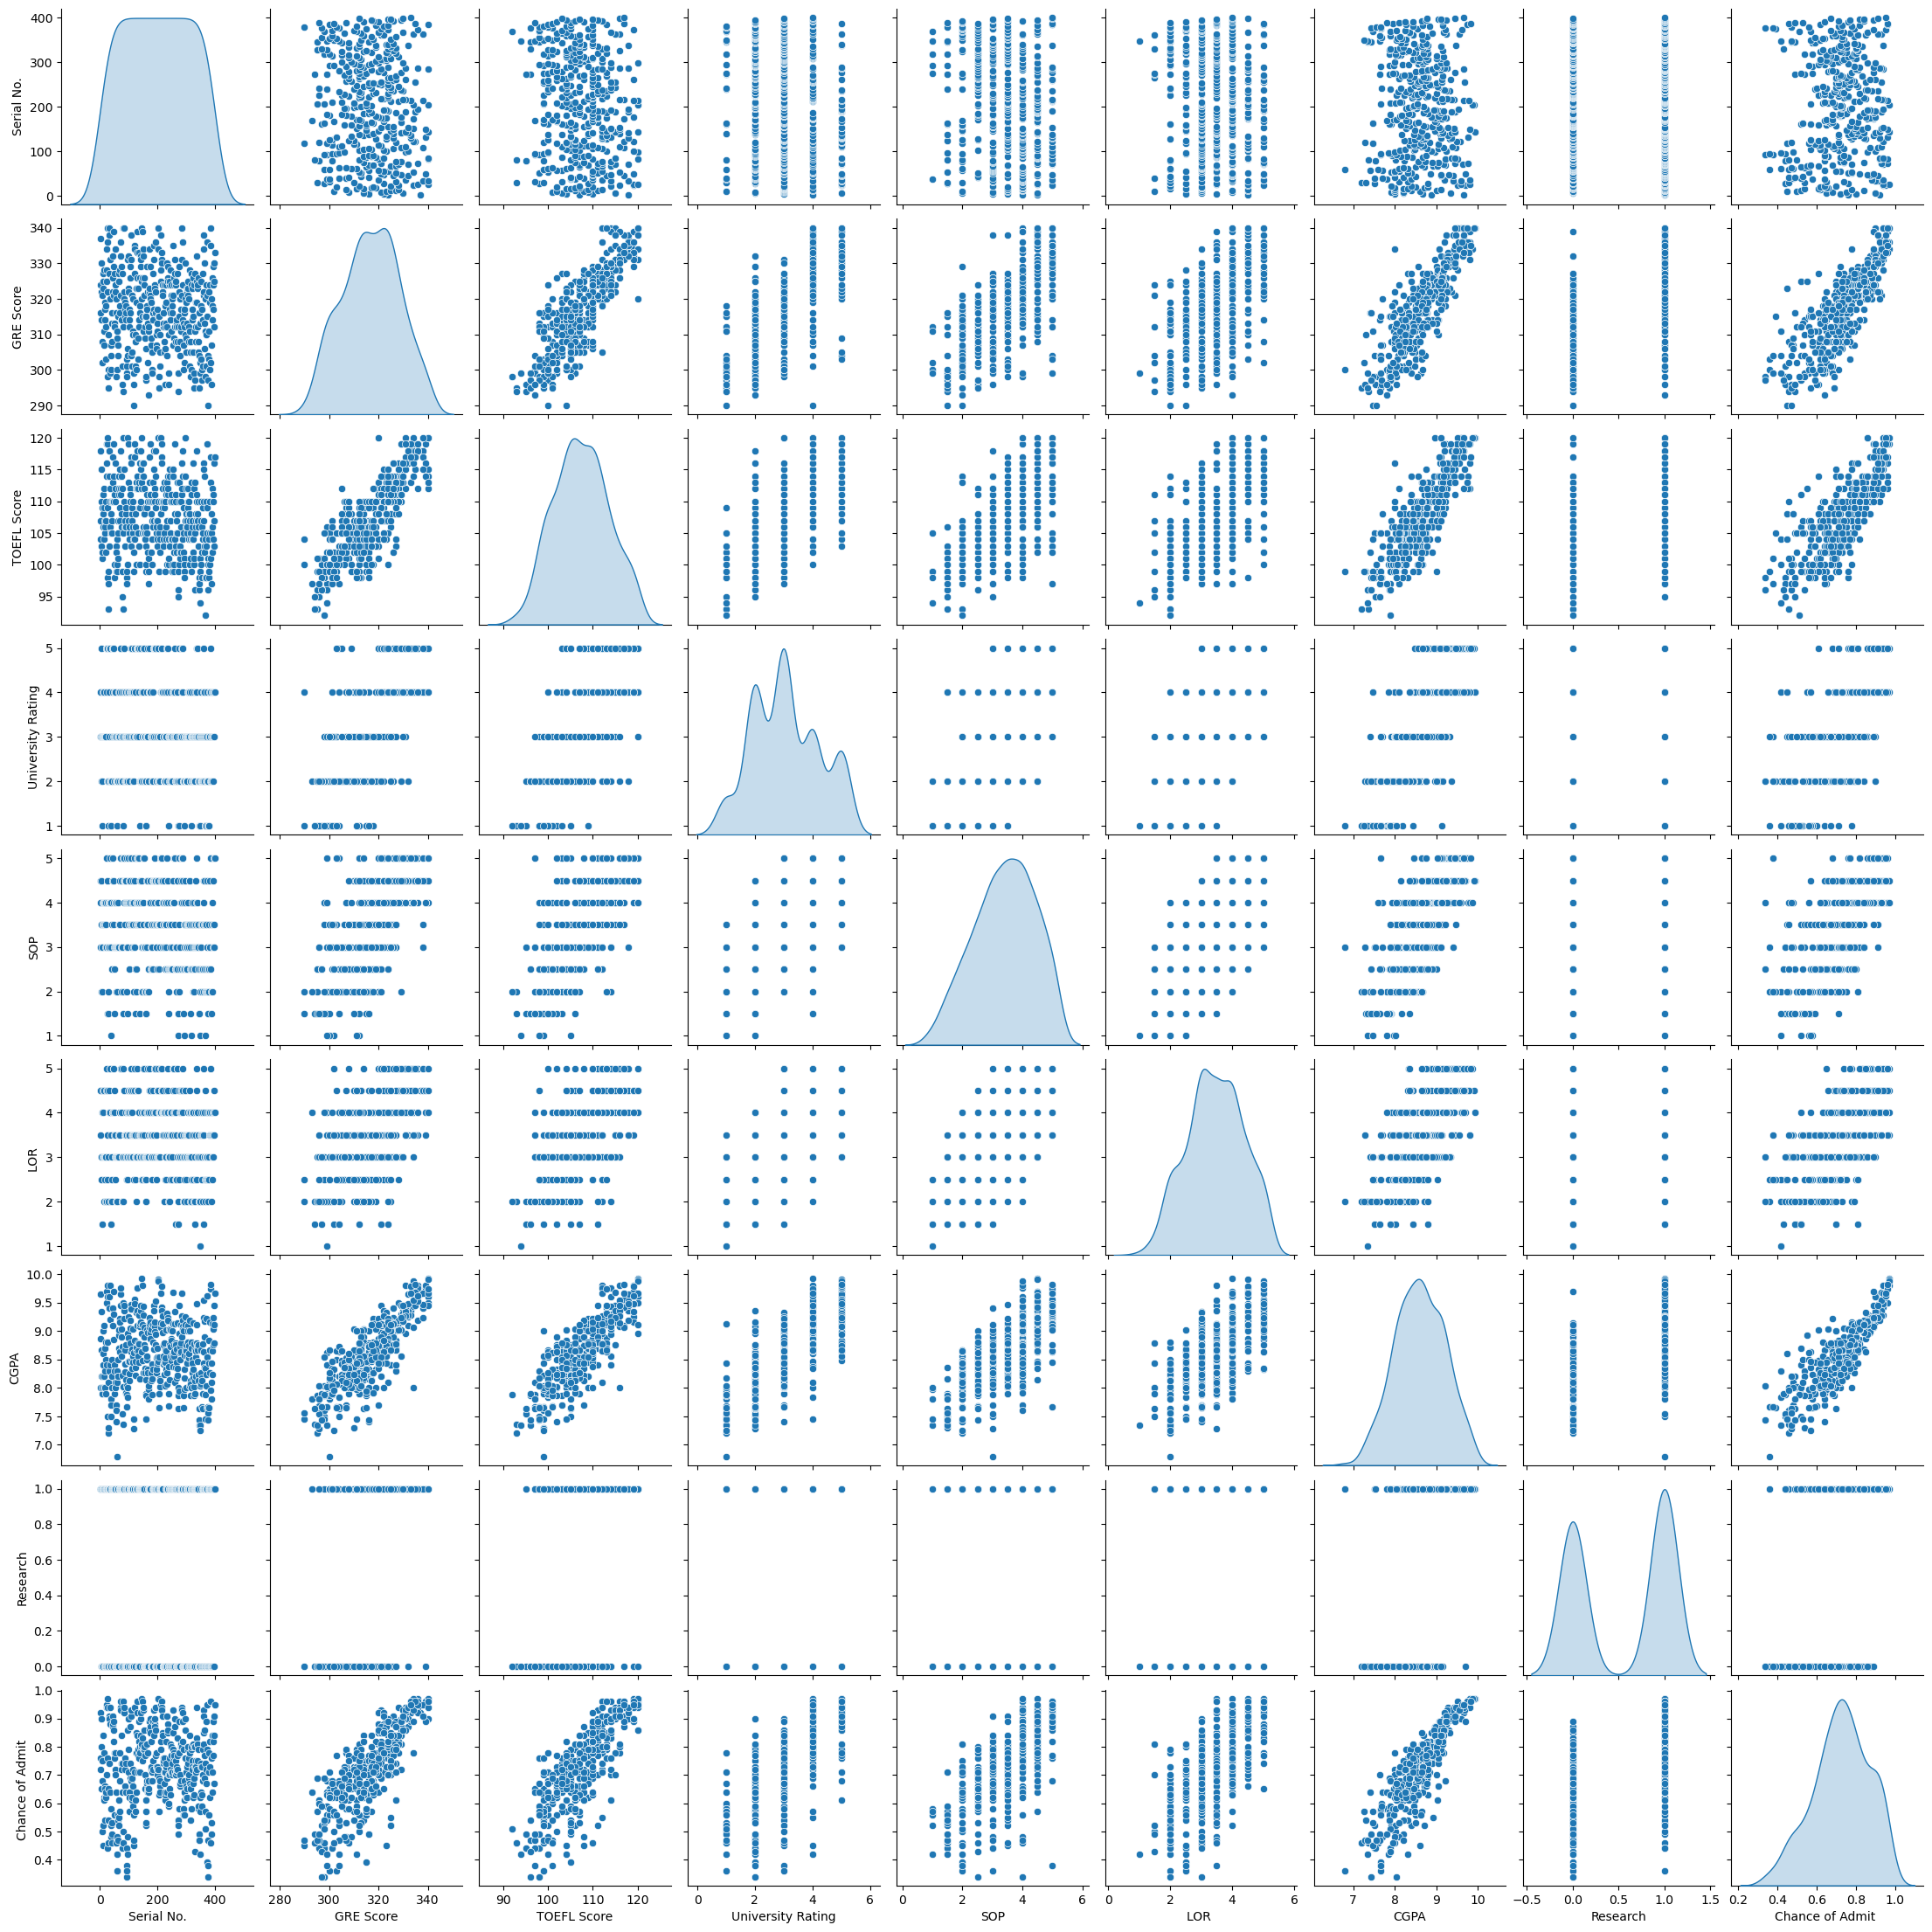

In [82]:
#Plot of features against each other
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

In [83]:
#getting the correlation matrix of dataframe
df.corr()

Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   
Chance of Admit      0.042336   0.802610     0.791594           0.711250   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138          0.042336  
GRE Score          0.612831  0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.657981  0.567721  0.828417  0.489858          0.791594  
University Rating  0.734523  0.660123  0.746479  0.447783          0.711250  
SOP                1.000000  0.729593  0.718144  0.444029          0.675732  
LOR                0.729593  1.000000  0.670211  0.396859          0.669889  
CGPA               0.718144  0.670211  1.000000  0.521654          0.873289  
Research           0.444029  0.396859  0.521654  1.000000          0.553202  
Chance of Admit    0.675732  0.669889  0.873289  0.553202          1.000000

<Axes: >

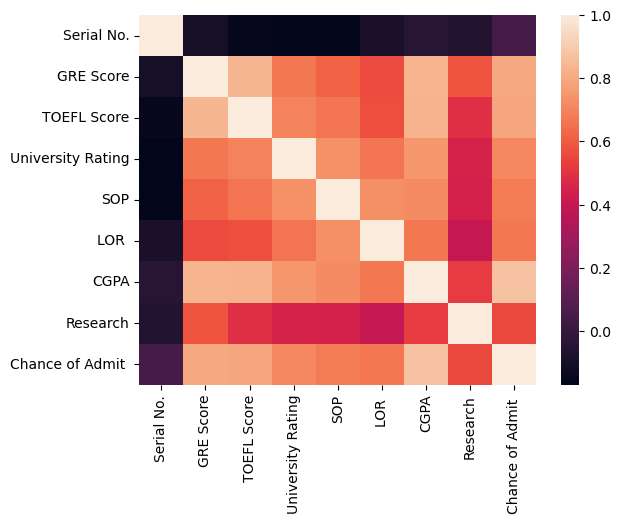

In [84]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

# Methodology

The target variable ‘Chance of Admit’ will be separated from the predictor variables.

In the model development step, a Decision Tree Regressor will be used to predict the ‘Chance of Admit’. The dataset will be split into a training set and a test set. The Decision Tree Regressor will be fitted and its parameters will be optimized using GridSearchCV. The model will then be re-fitted using the best parameters and used to predict the ‘Chance of Admit’ for the test set. The performance of the model will be evaluated based on these predictions.

The decision tree will be visualized and the tree will be exported as a .dot file for further examination. This methodology will allow for the development of a decision tree regression model that can predict the ‘Chance of Admit’ based on various predictor variables. The use of GridSearchCV for hyperparameter tuning will help to optimize the model’s performance.

In [86]:
y = df['Chance of Admit ']
X = df.drop(['Serial No.','Chance of Admit '],axis=1)

In [87]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [88]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [89]:
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [96]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [97]:
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [99]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('model', dtr)])
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [100]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [101]:
# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 2,
 'model__random_state': 2529}

In [102]:
# select best estimator
best = grid.best_estimator_

In [103]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=2, random_state=2529))])

In [104]:
# predict with best estimator
y_pred=best.predict(X_test)

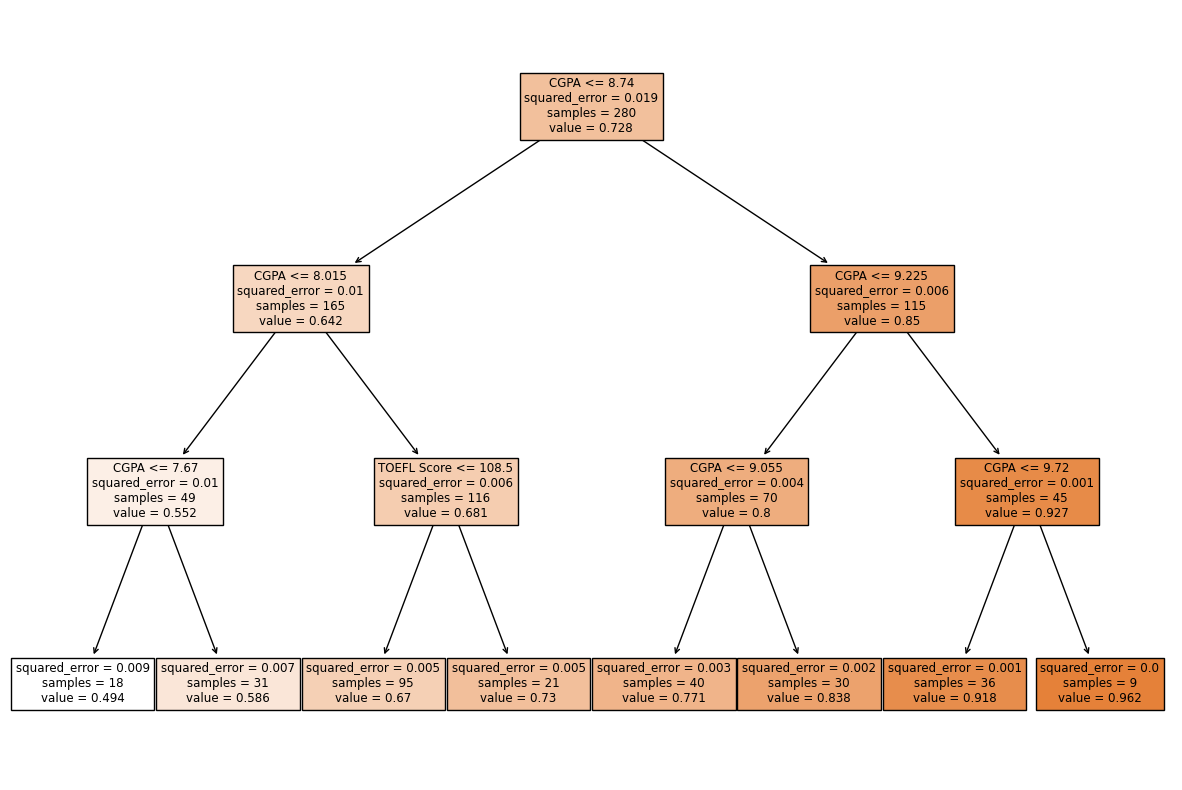

In [110]:
fig, ax = plt.subplots(figsize=(15,10))
final = DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train, y_train)
plot_tree(final, feature_names=X.columns.tolist(), filled=True)
plt.show()

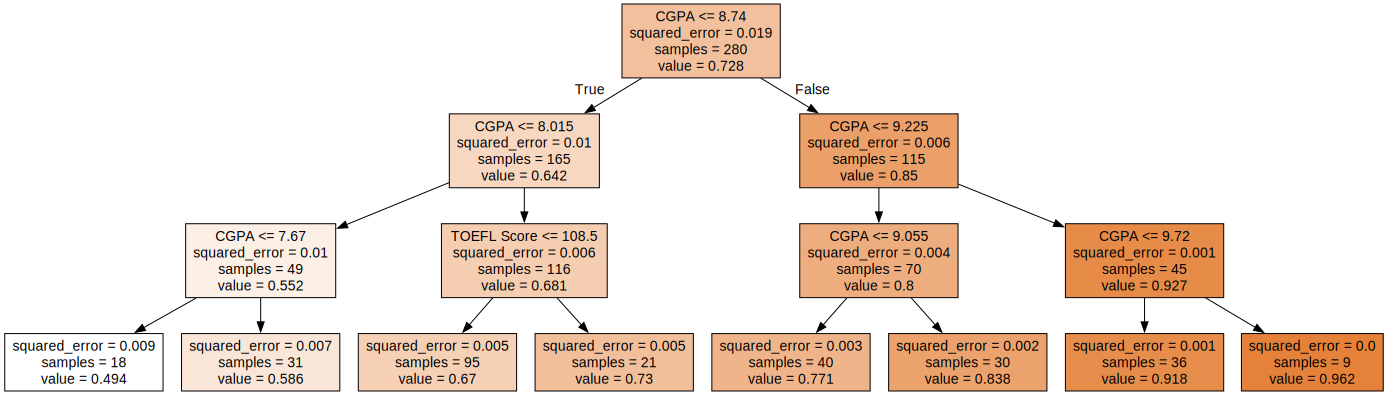

In [112]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(final, out_file=None, 
                feature_names=X.columns.tolist(),  
                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

# Result Analysis

In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Generate predictions
y_pred = final.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 0.05776598564062485
Mean Squared Error (MSE): 0.006126768595450386
Root Mean Squared Error (RMSE): 0.07827367753881496
R-squared (R2 ): 0.7315331943881513


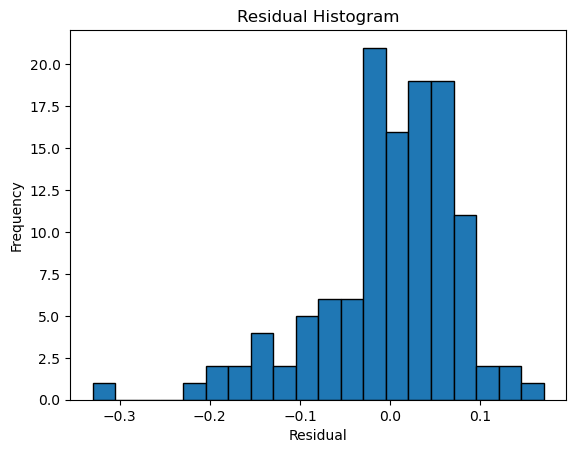

In [119]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

Most of the residuals are clustered around 0, indicating that the model’s predictions are generally accurate. However, there are also some negative residuals, suggesting that for those data points, the model’s predictions were higher than the actual values.

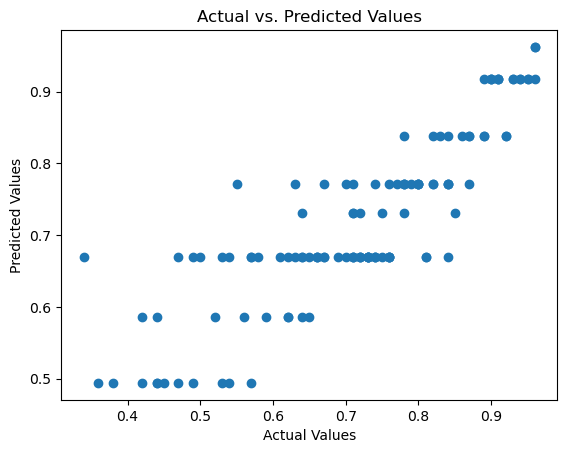

In [120]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [122]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(final, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Scores: {rmse_scores}")
print(f"Mean: {rmse_scores.mean()}")
print(f"Standard deviation: {rmse_scores.std()}")

Scores: [0.10755089 0.07929919 0.0612149  0.0514109  0.07723867]
Mean: 0.07534290757679203
Standard deviation: 0.019125593110171223


- Scores: These are the Root Mean Squared Error (RMSE) values for each of the 5 folds in the cross-validation. RMSE is a common metric for measuring the error rate of a regression model. The lower the RMSE, the better the model’s performance. For this model, the RMSE values range from about 0.051 to 0.108.


- Mean: This is the average of the RMSE scores, which gives you a single metric that summarises the overall performance of the model across all folds. Here, the mean RMSE is approximately 0.075.


- Standard deviation: This measures the variability of the RMSE scores. A low standard deviation indicates that the scores are close to the mean, while a high standard deviation indicates that the scores are spread out over a wider range. In this case, the standard deviation is approximately 0.019, which suggests that the model’s performance is fairly consistent across different folds.

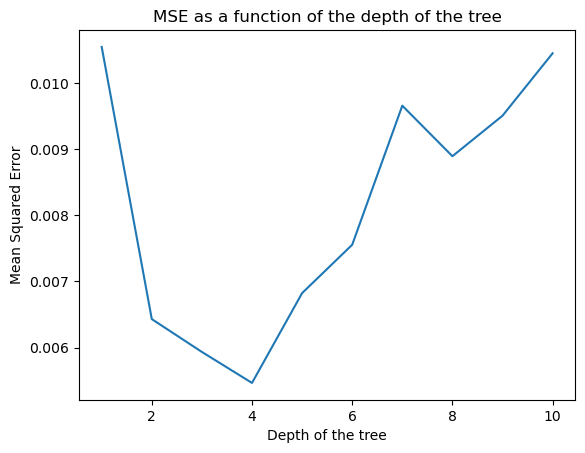

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# List of depths to try
depths = list(range(1, 11))

# List to store the MSE for each depth
errors = []

for depth in depths:
    # Train a decision tree regressor with the current depth
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dtr.fit(X_train, y_train)
    
    # Make predictions on the validation set and calculate the MSE
    y_pred = dtr.predict(X_val)
    error = mean_squared_error(y_val, y_pred)
    
    # Store the MSE
    errors.append(error)

# Plot the MSEs
plt.plot(depths, errors)
plt.xlabel('Depth of the tree')
plt.ylabel('Mean Squared Error')
plt.title('MSE as a function of the depth of the tree')
plt.show()

At a depth of 2, the MSE is highest, around 0.010. This suggests that a tree of depth 2 is not complex enough to capture the patterns in the data.
As the depth increases to 4, the MSE decreases to just above 0.006. This indicates that increasing the tree depth improves the model’s performance.
However, after a depth of 4, the MSE starts to increase again, peaking at a depth of 6. This means increasing the tree depth beyond 4 leads to overfitting, where the model starts to fit the noise in the training data, reducing its ability to generalize to new data.
At depths of 7 and 8, the MSE decreases slightly, but then it starts to increase again for depths of 9 and 10.
So, according to this graph, a tree depth of 4 gives the lowest MSE and is  the optimal depth for this particular model and dataset. 

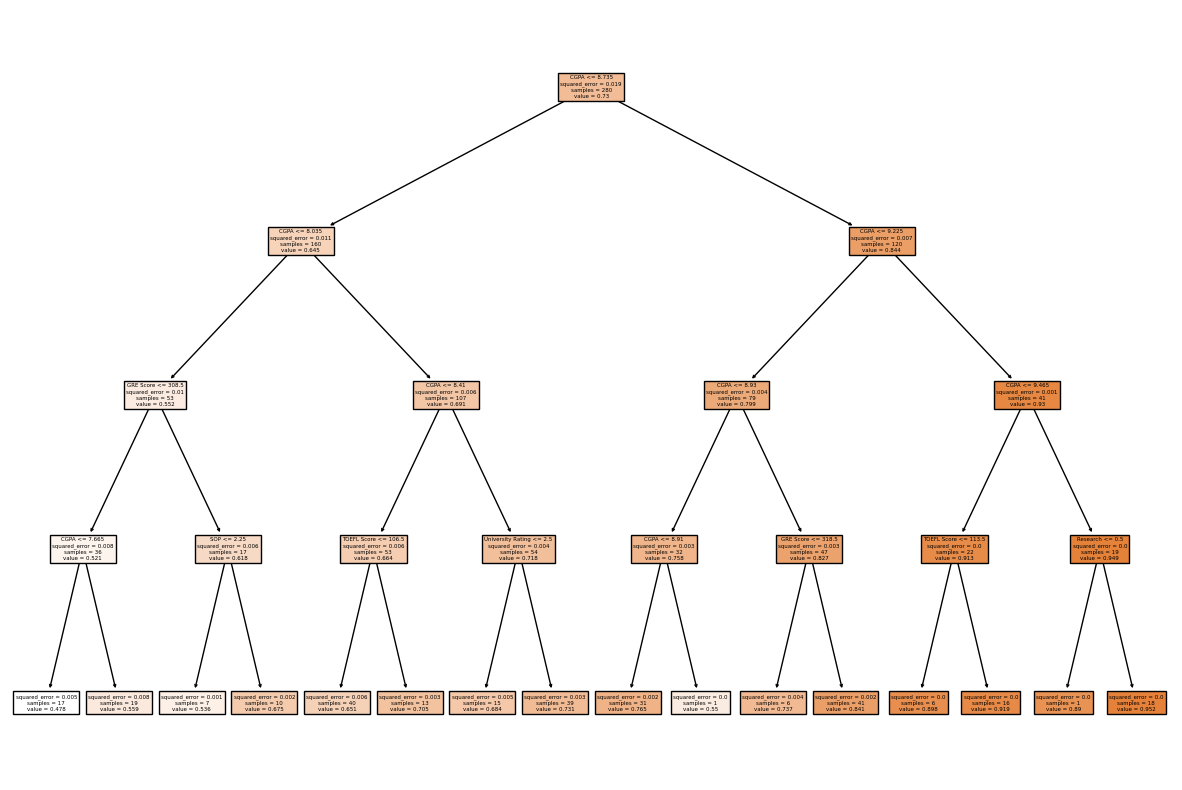

In [124]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Initialize the model
dtr = DecisionTreeRegressor(max_depth=4, random_state=2529)

# Train the model
dtr.fit(X_train, y_train)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15,10))

# Plot the tree
plot_tree(dtr, feature_names=X.columns.tolist(), filled=True)

# Show the plot
plt.show()

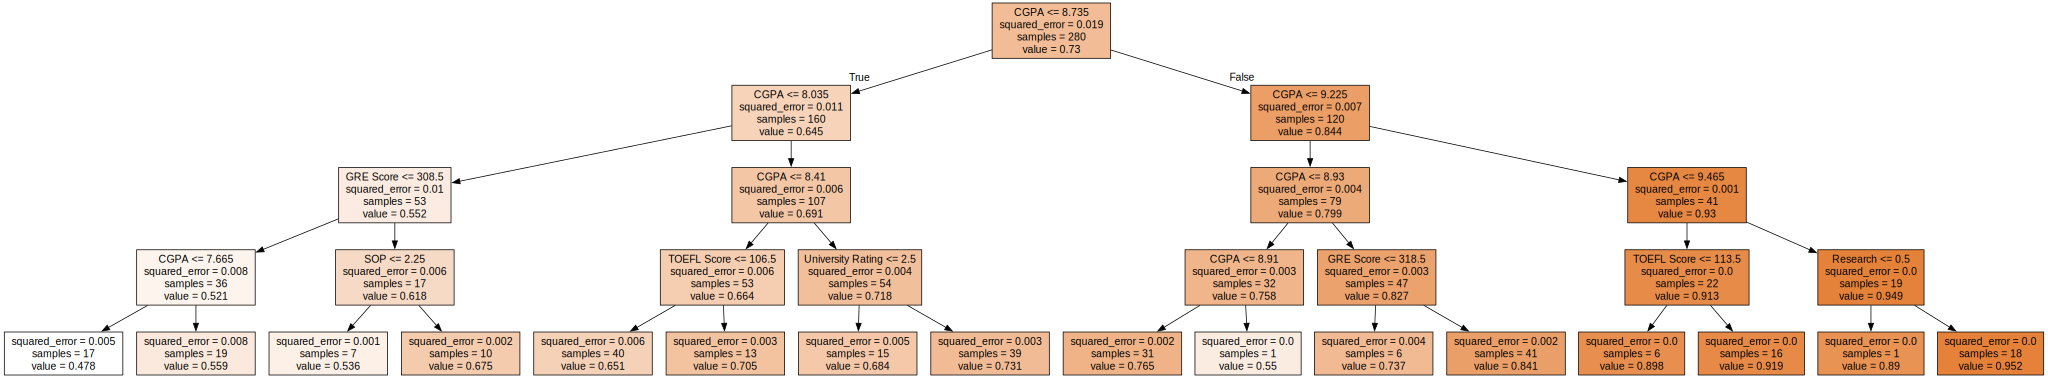

In [127]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr, out_file=None, feature_names=X.columns.tolist(), filled=True)
graph = graphviz.Source(dot_data)
graph

In [129]:
# Generate predictions with the new tree
y_pred_new = dtr.predict(X_test)

# Calculate metrics for the new tree
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)  
r2_new = r2_score(y_test, y_pred_new)

print(f"Mean Absolute Error (MAE) for new tree: {mae_new}")
print(f"Mean Squared Error (MSE) for new tree: {mse_new}")
print(f"Root Mean Squared Error (RMSE) for new tree: {rmse_new}")
print(f"R-squared (R2) for new tree: {r2_new}")

Mean Absolute Error (MAE) for new tree: 0.043702826606830815
Mean Squared Error (MSE) for new tree: 0.003583553621492218
Root Mean Squared Error (RMSE) for new tree: 0.059862789957470394
R-squared (R2) for new tree: 0.8429734731265682


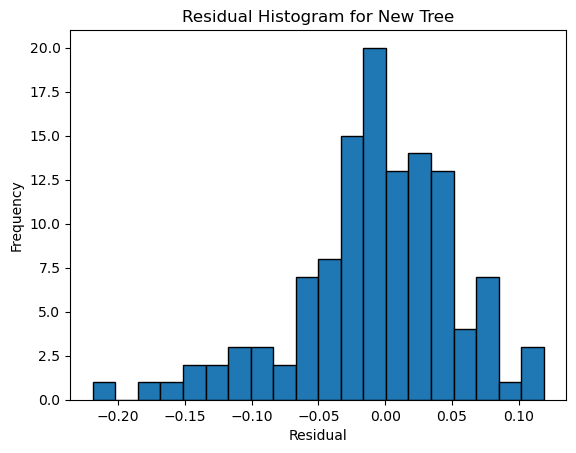

In [130]:
# Calculate residuals for the new tree
residuals_new = y_test - y_pred_new

# Plot the histogram of residuals for the new tree
plt.hist(residuals_new, bins=20, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram for New Tree')
plt.show()

Most of the residuals are clustered around 0, indicating that the model’s predictions are generally accurate. However, there are also some negative and positive residuals, suggesting that for those data points, the model’s predictions were either higher or lower than the actual values.

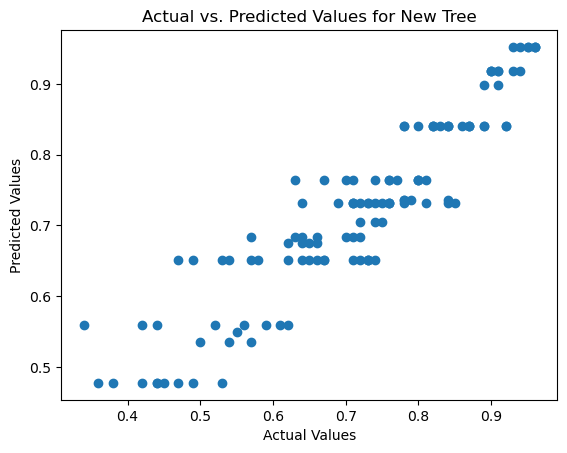

In [133]:
plt.scatter(y_test, y_pred_new)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for New Tree')
plt.show()

The closer the data points are to a diagonal line from the bottom left to the top right, the better the predictions. While this is better than the previous tree, it is still slightly low in predictive power

In [132]:
scores_new = cross_val_score(dtr, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores_new = np.sqrt(-scores_new)
print(f"Scores for new tree: {rmse_scores_new}")
print(f"Mean for new tree: {rmse_scores_new.mean()}")
print(f"Standard deviation for new tree: {rmse_scores_new.std()}")

Scores for new tree: [0.10719628 0.07558213 0.06495223 0.0494153  0.07454583]
Mean for new tree: 0.07433835562358077
Standard deviation for new tree: 0.018923483041907066


The model’s performance varied across different subsets of the data, with scores ranging from 0.0494 to 0.1072.
On average, the model’s performance score was 0.0743.
The variation in the model’s performance across different subsets was 0.0189. This indicates the consistency in the model’s performance.

# Conclusion

**Entropy**

The model accuracy score with criterion entropy is consistent at 0.9674 for both depths, indicating that the model is able to predict with high accuracy on unseen data. The training-set accuracy score shows a slight increase from 0.9754 to 0.9820 when changing depths, suggesting that the model is slightly better at predicting the training data at the higher depth. This could be due to the model being able to capture more complex patterns in the data at a greater depth. The test set score, which is a better indicator of how well the model generalizes, remains fairly consistent at 0.9674 and 0.9694.

**Gini**

From the graph, which showed that a tree with depth of 6 would be better than the previous, arbitrarily chosen depth of 5, I confirmed that the accuracy of the second tree (0.9780) is higher than the first tree (0.9667). The training-set accuracy score of the second tree (0.9794) is also slightly higher than the first tree (0.9743). The F1 score of the second tree (0.9778)was also higher than the first tree (0.9665).
This proves that the second tree is better at correctly classifying instances from the dataset and preditcing the training data.

**Comparison of Entropy based model with Gini based model**

Both Gini and Entropy CART models have similar accuracy scores, with Gini having a slightly higher accuracy in the second tree (0.9780 vs 0.9674). This suggests that both criteria are similarly effective for this dataset.
The F1 scores, which consider both precision and recall, are also similar for both models. However, the Gini model has a slightly higher F1 score in the second tree (0.9778 vs 0.9669), indicating a slightly better balance between precision and recall.

**Regression Tree**

From the plotted graph, I had interpreted that a depth of 4 would be better than the previously chosen depth of 3. 

The MAE, MSE and RMSE for the second tree are lower than the first tree. This means that on average, the absolute difference between the predicted and actual values is smaller in the second tree. This proves that the second tree has better predictive accuracy.

The R2 score for the second tree (0.8430) is higher than the first tree (0.7315).

The mean cross-validation score for the second tree (0.0743) is slightly lower than the first tree (0.0753), and the standard deviation of the cross-validation scores for the second tree (0.0189) is also slightly lower than the first tree (0.0191). So, second tree’s performance is more consistent across different subsets of the dataset.

# References

1. https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

2. https://graphviz.org/download/

3. https://anantha-kattani.medium.com/visualizing-a-decision-tree-using-graphviz-and-pydotplus-24a046faac0b

4. https://www.datacamp.com/tutorial/decision-tree-classification-python
5. https://www.codecademy.com/article/mlfun-decision-trees-article